In [151]:
import pandas as pd
import numpy as np
import tqdm
# import gc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)

# Data

## Risk Free rate

Risk free rate is from RESSET database. 
Specifically,
1. 本表提供用于研究的日无风险收益数据。
2. 数据选择标准： 开始--2002年8月6日用三个月期定期银行存款利率； 2002年8月7日--2006年10月7日用三个月期中央银行票据的票面利率； 2006年10月8日--当前,用上海银行间3个月同业拆放利率。
3. 本表已将年度化的基准利率转化为以日为单位计量的收益数据，研究时可直接引用。

In [152]:
# Data is uploaded into uqer, but where is it?
! ls

1-EDA.ipynb			       factors.ipynb
2-sort_FMreg_on_beta_size-Copy1.ipynb  F-F_Research_Data_Factors_daily.csv
3-FF3.ipynb			       idx_df_csv.csv
4-momentum_reversal.ipynb	       index_df_21_22.pkl
5-backtest_crs.ipynb		       __pycache__
5-liquidity_volatility.ipynb	       reversal.ipynb
6-crs_and_timing.ipynb		       rf-daily.csv
data				       rf-monthly.csv
data_download.ipynb		       stk_df_21_22.pkl
exam				       stk_df.pkl
example_csv.csv			       Untitled.ipynb
experiments			       新股策略
factor_func.py


In [153]:
! ls ..

datas  nbconvert	notebook_secret  notes_py3
lib    nbsignatures.db	notes		 runtime


In [154]:
# 👇 There it is!
! ls ../datas

rf-daily.csv


In [155]:
rf_df = pd.read_csv('rf-daily.csv')

In [156]:
rf_df.head()

日期_Date  日无风险收益率_DRFRet  Unnamed: 2
0  2000-01-01        0.000054         NaN
1  2000-01-02        0.000054         NaN
2  2000-01-03        0.000054         NaN
3  2000-01-04        0.000054         NaN
4  2000-01-05        0.000054         NaN

In [157]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8075 entries, 0 to 8074
Data columns (total 3 columns):
日期_Date           8075 non-null object
日无风险收益率_DRFRet    8075 non-null float64
Unnamed: 2        0 non-null float64
dtypes: float64(2), object(1)
memory usage: 189.3+ KB


In [158]:
rf_df.drop('Unnamed: 2',axis=1,inplace=True)

In [159]:
rf_df.rename(columns={'日无风险收益率_DRFRet':'rf','日期_Date':'date'},inplace=True)

In [160]:
rf_df['date'] = pd.to_datetime(rf_df['date'], format='%Y-%m-%d')

In [161]:
rf_df.head()

date        rf
0 2000-01-01  0.000054
1 2000-01-02  0.000054
2 2000-01-03  0.000054
3 2000-01-04  0.000054
4 2000-01-05  0.000054

In [162]:
stk_info = DataAPI.SecIDGet(assetClass="E",pandas="1")
stk_id = stk_info['secID']
index_info = DataAPI.SecIDGet(assetClass="IDX",pandas="1")

In [163]:
stk_info.head()

secID  ticker secShortName cnSpell exchangeCD assetClass  \
0  000001.XSHE  000001         平安银行    PAYH       XSHE          E   
1  000002.XSHE  000002          万科A     WKA       XSHE          E   
2  000003.XSHE  000003        PT金田A   PTJTA       XSHE          E   
3  000004.XSHE  000004         国华网安    GHWA       XSHE          E   
4  000005.XSHE  000005         ST星源    STXY       XSHE          E   

  listStatusCD    listDate transCurrCD          ISIN  partyID  delistDate  
0            L  1991-04-03         CNY  CNE000000040      2.0         NaN  
1            L  1991-01-29         CNY  CNE0000000T2      3.0         NaN  
2           DE  1991-07-03         CNY  CNE1000031Y5      4.0  2002-06-14  
3            L  1991-01-14         CNY  CNE0000000Y2      5.0         NaN  
4            L  1990-12-10         CNY  CNE0000001L7      6.0         NaN

In [164]:
index_info.head()

secID       ticker secShortName  cnSpell exchangeCD assetClass  \
0  000001.ESCI.XZCE  000001.ESCI       易盛农期综指   YSNQZZ       XZCE        IDX   
1       000001.ZICN       000001         上证综指     SZZZ       XSHG        IDX   
2  000001CNY01.XSHG  000001CNY01      上证指数(全)  SZZS(Q)       XSHG        IDX   
3  000002.ESCI.XZCE  000002.ESCI       易盛农期谷物   YSNQGW       XZCE        IDX   
4       000002.ZICN       000002         上证A股     SZAG       XSHG        IDX   

  listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
0            L         NaN         CNY           NaN  27145.0        NaN  
1            L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
2            L  2020-10-09         CNY           NaN  17764.0        NaN  
3            L  2018-10-22         CNY           NaN  27145.0        NaN  
4            L  1992-02-21         CNY  CNM000000027  17764.0        NaN

In [165]:
index_info['secID'].nunique()

13108

## Market Index return

In [166]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1     000001.ZICN  000001         上证综指    SZZZ       XSHG        IDX   
175   000300.ZICN  000300        沪深300   HS300       XSHG        IDX   
270   000852.ZICN  000852       中证1000  ZZ1000       XSHG        IDX   
289   000905.ZICN  000905        中证500   ZZ500       XSHG        IDX   
447   399006.ZICN  399006         创业板指    CYBZ       XSHE        IDX   
467   399106.ZICN  399106         深证综指    SZZZ       XSHE        IDX   
509   399300.ZICN  399300        沪深300   HS300       XSHE        IDX   
755   399905.ZICN  399905        中证500   ZZ500       XSHE        IDX   
8815     CNT.XSHE     CNT         创业板指    CYBZ       XSHE        IDX   
8828  CSI300.XHKG  CSI300        沪深300   HS300       XHKG        IDX   

     listStatusCD    listDate transCurrCD          ISIN  partyID delistDate  
1               L  1991-07-15         CNY  CNM000000019  17764.0        NaN  
175             L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
270             L  2014-10-17         CNY           NaN  17768.0        NaN  
289             L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
447             L  2010-06-01         CNY           NaN  17765.0        NaN  
467             L  1991-04-04         CNY  CNM000000001  17765.0        NaN  
509             L  2005-04-08         CNY  CNM0000001Y0  17768.0        NaN  
755             L  2007-01-15         CNY  CNM0000007J8  17768.0        NaN  
8815            L  2010-06-01         CNY           NaN  17765.0        NaN  
8828            L  2005-04-08         CNY           NaN  17768.0        NaN

In [167]:
index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values

array(['000001.ZICN', '000300.ZICN', '000852.ZICN', '000905.ZICN',
       '399006.ZICN', '399106.ZICN'], dtype=object)

In [168]:
sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
start = '20000101'
end = '20221231'
index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")

In [169]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26808 entries, 0 to 26807
Data columns (total 7 columns):
indexID          26808 non-null object
secShortName     26808 non-null object
tradeDate        26808 non-null object
closeIndex       26808 non-null float64
turnoverVol      26088 non-null float64
turnoverValue    26088 non-null float64
CHGPct           26808 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.4+ MB


In [170]:
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')

In [171]:
index_df.head()

indexID secShortName  tradeDate  closeIndex   turnoverVol  \
0  000001.ZICN         上证综指 2000-01-04    1406.371  9.034023e+08   
1  000001.ZICN         上证综指 2000-01-05    1409.682  1.057998e+09   
2  000001.ZICN         上证综指 2000-01-06    1463.942  1.348052e+09   
3  000001.ZICN         上证综指 2000-01-07    1516.604  3.451570e+09   
4  000001.ZICN         上证综指 2000-01-10    1545.112  3.125354e+09   

   turnoverValue    CHGPct  
0   5.183898e+09  0.029117  
1   8.137326e+09  0.002354  
2   9.520842e+09  0.038491  
3   1.948719e+10  0.035973  
4   1.877911e+10  0.018797

In [172]:
index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')

In [173]:
index_ret_df.head()

secShortName      上证综指  中证1000  中证500  创业板指  沪深300      深证综指
tradeDate                                                   
2000-01-04    0.029117     NaN    NaN   NaN    NaN  0.031088
2000-01-05    0.002354     NaN    NaN   NaN    NaN  0.003075
2000-01-06    0.038491     NaN    NaN   NaN    NaN  0.041107
2000-01-07    0.035973     NaN    NaN   NaN    NaN  0.037170
2000-01-10    0.018797     NaN    NaN   NaN    NaN  0.021311

In [174]:
rf_df.set_index('date',inplace=True)

In [175]:
rf_df.head()

rf
date                
2000-01-01  0.000054
2000-01-02  0.000054
2000-01-03  0.000054
2000-01-04  0.000054
2000-01-05  0.000054

In [176]:
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)

In [177]:
index_ret_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指        rf
2000-01-04  0.029117     NaN    NaN   NaN    NaN  0.031088  0.000054
2000-01-05  0.002354     NaN    NaN   NaN    NaN  0.003075  0.000054
2000-01-06  0.038491     NaN    NaN   NaN    NaN  0.041107  0.000054
2000-01-07  0.035973     NaN    NaN   NaN    NaN  0.037170  0.000054
2000-01-10  0.018797     NaN    NaN   NaN    NaN  0.021311  0.000054

In [178]:
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0) # 计算超额收益率

In [179]:
index_retx_df.head()

上证综指  中证1000  中证500  创业板指  沪深300      深证综指
2000-01-04  0.029063     NaN    NaN   NaN    NaN  0.031034
2000-01-05  0.002300     NaN    NaN   NaN    NaN  0.003021
2000-01-06  0.038437     NaN    NaN   NaN    NaN  0.041053
2000-01-07  0.035919     NaN    NaN   NaN    NaN  0.037116
2000-01-10  0.018743     NaN    NaN   NaN    NaN  0.021257

In [180]:
# sec_id = index_info[index_info['secShortName'].isin(['上证综指','深证综指','创业板指','沪深300','中证500','中证1000'])].drop_duplicates('secShortName').secID.values
# start = '20000101'
# end = '20221231'
# index_df = DataAPI.MktIdxdGet(indexID=sec_id,beginDate=start,endDate=end,field=['indexID','secShortName','tradeDate','closeIndex','turnoverVol','turnoverValue','CHGPct'],pandas="1")
# index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
# index_ret_df = index_df.pivot(index='tradeDate',columns='secShortName',values='CHGPct')
# index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
# index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

### Market Index Return Plot

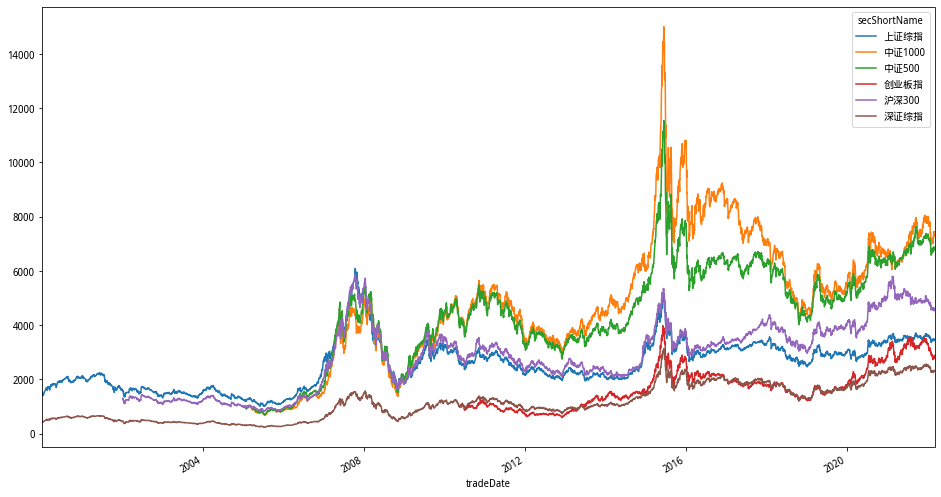

In [181]:
# Raw index plot
index_df.pivot(index='tradeDate',columns='secShortName',values='closeIndex').plot()

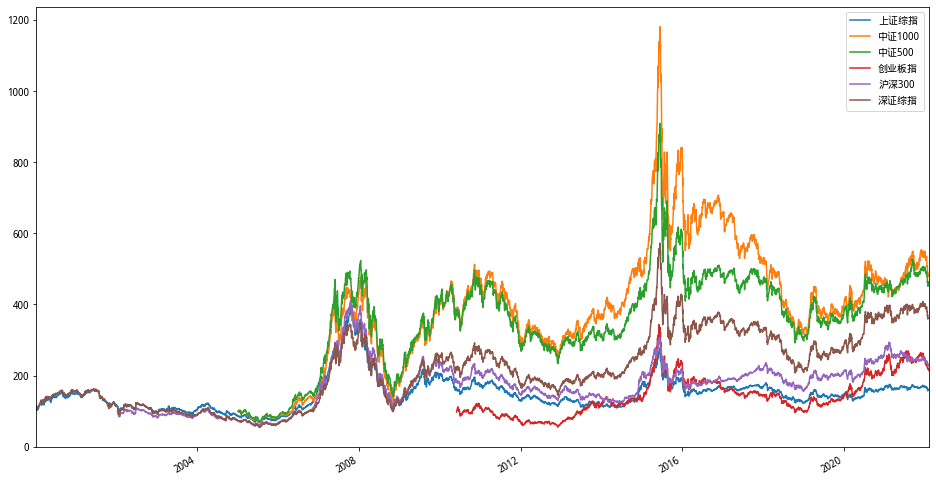

In [182]:
((1 + index_retx_df).cumprod()*100).plot()

早期的平稳可能是一种假象：数据到后面会越来越大。log return会看得更清楚

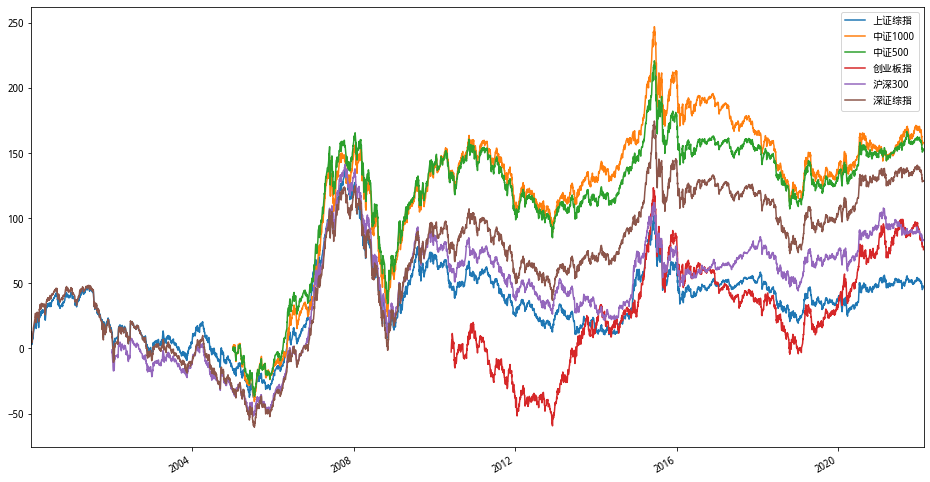

In [183]:
# log return
(np.log(1 + index_retx_df).cumsum()*100).plot()

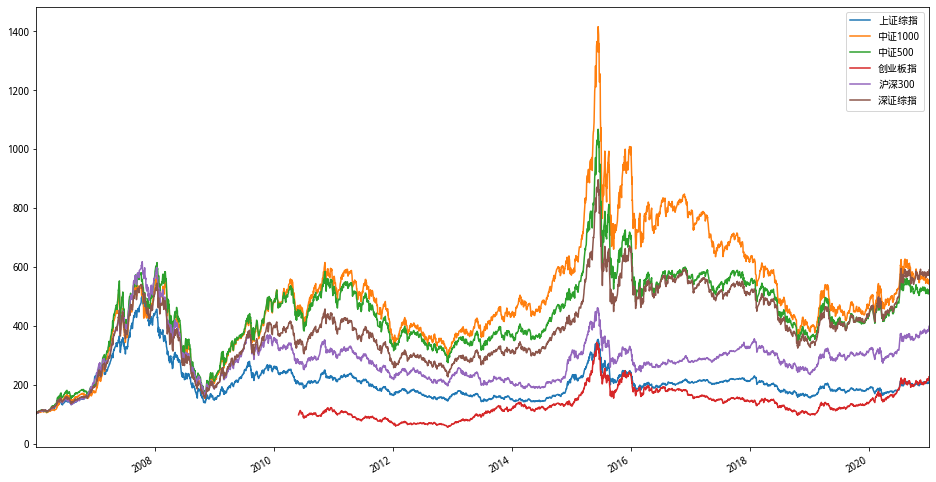

In [184]:
((1 + index_retx_df.loc['2006':'2020']).cumprod()*100).plot()

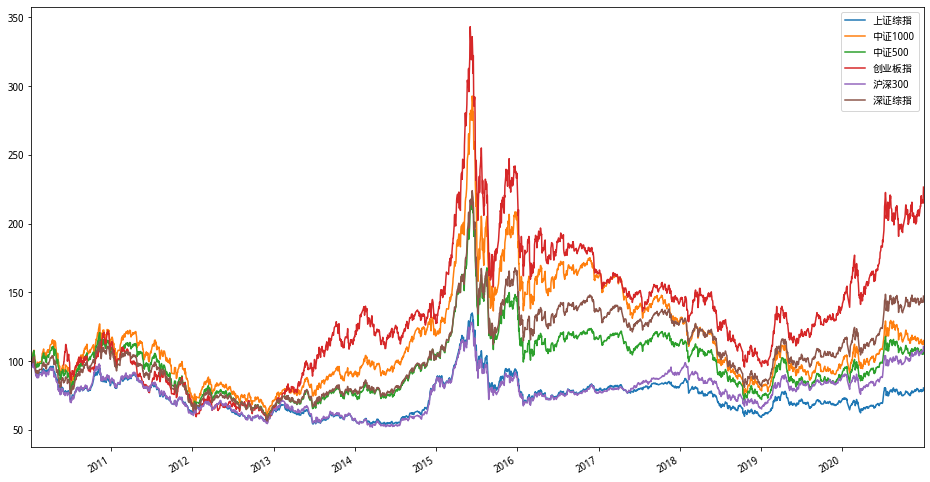

In [185]:
((1 + index_retx_df.loc['2010':'2020']).cumprod()*100).plot()

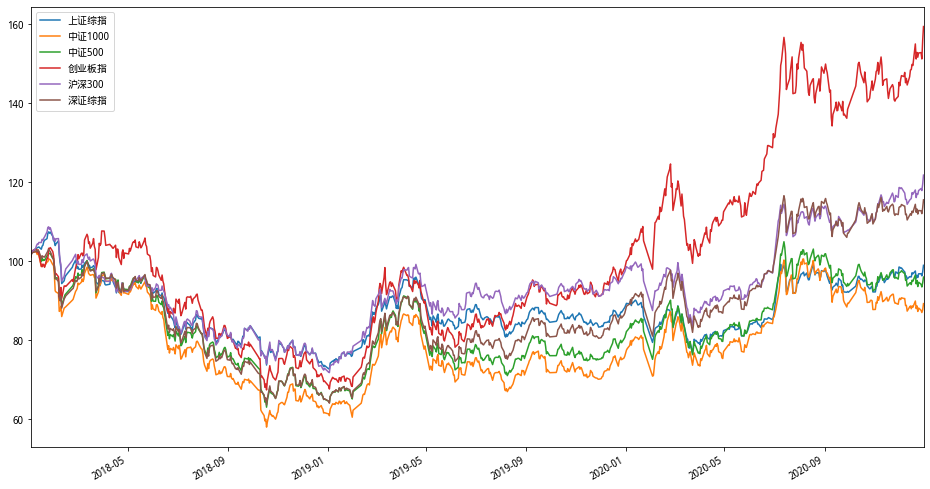

In [186]:
((1 + index_retx_df.loc['2018':'2020']).cumprod()*100).plot()

In [187]:
index_retx_df.describe()

上证综指       中证1000        中证500         创业板指        沪深300  \
count  5353.000000  4153.000000  4153.000000  2839.000000  4873.000000   
mean      0.000205     0.000576     0.000552     0.000459     0.000304   
std       0.015201     0.019669     0.019041     0.019549     0.016304   
min      -0.088484    -0.087943    -0.089605    -0.089187    -0.092478   
25%      -0.006605    -0.008054    -0.007806    -0.009785    -0.007329   
50%       0.000516     0.001920     0.001819     0.000732     0.000572   
75%       0.007316     0.011421     0.010897     0.011395     0.007979   
max       0.098516     0.097469     0.098603     0.071505     0.093851   

              深证综指  
count  5353.000000  
mean      0.000387  
std       0.017062  
min      -0.085510  
25%      -0.007576  
50%       0.001236  
75%       0.009450  
max       0.096788

In [188]:
0.0195*np.sqrt(250)

0.30832207186641697

In [189]:
0.0152*np.sqrt(250)

0.24033310217279683

## Market return in US

In [190]:
us_df = pd.read_csv('F-F_Research_Data_Factors_daily.csv',skiprows=3)
us_df.drop(us_df.index.values[-1],inplace=True)

In [191]:
us_df.rename(columns={'Unnamed: 0': 'date'},inplace=True)

In [192]:
us_df['date'] = pd.to_datetime(us_df['date'],format='%Y%m%d')

In [193]:
us_df['Mkt-RF'] = us_df['Mkt-RF']*0.01
us_df.set_index('date',inplace=True)

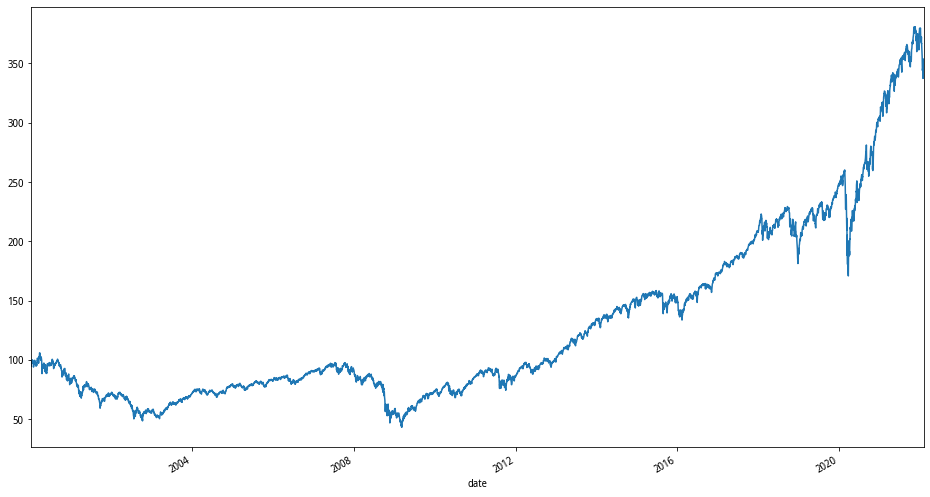

In [194]:
((1 + us_df.loc['2000':'2022','Mkt-RF']).cumprod()*100).plot()

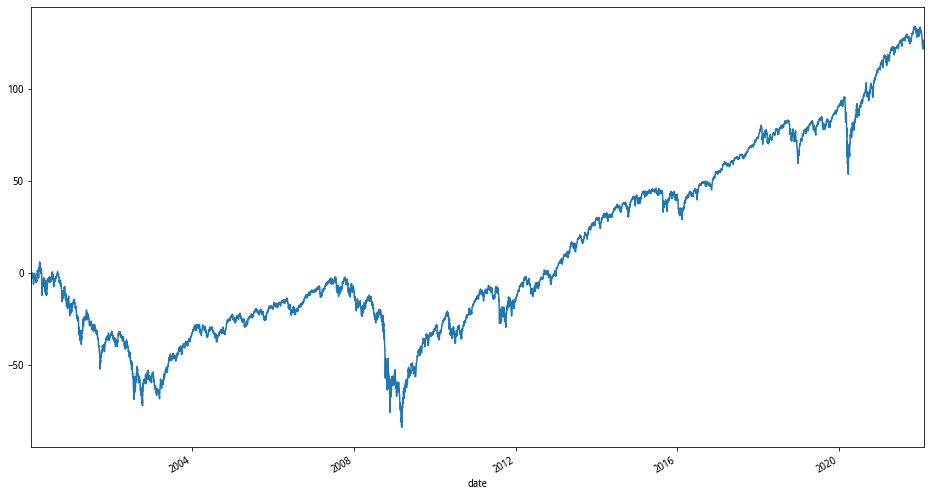

In [195]:
(np.log(1 + us_df.loc['2000':'2022','Mkt-RF']).cumsum()*100).plot()

In [196]:
us_df.loc['2000':'2022','Mkt-RF'].describe()

count    5556.000000
mean        0.000306
std         0.012515
min        -0.120000
25%        -0.004800
50%         0.000700
75%         0.006000
max         0.113500
Name: Mkt-RF, dtype: float64

In [197]:
0.0125*np.sqrt(250)

0.19764235376052372

## Industry Index Return

In [198]:
shenwan_industry_idx1 = ['传媒','电力设备','电子','房地产','纺织服饰','非银金融','钢铁','公用事业','国防军工','环保','机械设备','基础化工','计算机','家用电器','建筑材料','建筑装饰','交通运输','煤炭','美容护理','农林牧渔','社会服务','石油石化','食品饮料','汽车','轻工制造','通信','综合','医药生物','银行','有色金属','商贸零售']

In [199]:
len(shenwan_industry_idx1)

31

In [200]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万'))]

957            申万50
958            申万中小
959            申万A指
960            申万创业
961          申万A股主板
962        申万宏源专精特新
963          申万农林牧渔
964           申万林业Ⅱ
965         申万农产品加工
966         申万农业综合Ⅱ
967            申万饲料
968            申万渔业
969           申万种植业
970           申万养殖业
971         申万动物保健Ⅱ
972         申万农业综合Ⅱ
973            申万采掘
974         申万煤炭开采Ⅱ
975         申万其他采掘Ⅱ
976         申万石油开采Ⅱ
977          申万采掘服务
978          申万基础化工
979        申万化工新材料Ⅱ
980          申万化学纤维
981          申万化学原料
982          申万化学制品
983          申万石油化工
984            申万塑料
985            申万橡胶
986          申万农化制品
           ...     
8979    通联全A-申万有色金属
8980    通联全A-申万建筑材料
8981    通联全A-申万建筑装饰
8982    通联全A-申万电气设备
8983    通联全A-申万机械设备
8984    通联全A-申万国防军工
8985      通联全A-申万汽车
8986      通联全A-申万电子
8987    通联全A-申万家用电器
8988    通联全A-申万食品饮料
8989    通联全A-申万纺织服装
8990    通联全A-申万轻工制造
8991    通联全A-申万医药生物
8992    通联全A-申万公用事业
8993    通联全A-申万交通运输
8994     通联全A-申万房地产
8995      通联全A-申万银行
8996    通联全A-申万非银金融
8997    通联全A-申万商业贸易


In [201]:
shenwan_industry_idx1 = ['申万' + indry for indry in shenwan_industry_idx1]

In [202]:
shenwan_industry_idx1

['申万传媒',
 '申万电力设备',
 '申万电子',
 '申万房地产',
 '申万纺织服饰',
 '申万非银金融',
 '申万钢铁',
 '申万公用事业',
 '申万国防军工',
 '申万环保',
 '申万机械设备',
 '申万基础化工',
 '申万计算机',
 '申万家用电器',
 '申万建筑材料',
 '申万建筑装饰',
 '申万交通运输',
 '申万煤炭',
 '申万美容护理',
 '申万农林牧渔',
 '申万社会服务',
 '申万石油石化',
 '申万食品饮料',
 '申万汽车',
 '申万轻工制造',
 '申万通信',
 '申万综合',
 '申万医药生物',
 '申万银行',
 '申万有色金属',
 '申万商贸零售']

In [203]:
index_info['secShortName'][(index_info['secShortName'].str.contains('申万')) & 
                           (~index_info['secShortName'].str.contains('Ⅱ$'))]

957            申万50
958            申万中小
959            申万A指
960            申万创业
961          申万A股主板
962        申万宏源专精特新
963          申万农林牧渔
965         申万农产品加工
967            申万饲料
968            申万渔业
969           申万种植业
970           申万养殖业
973            申万采掘
977          申万采掘服务
978          申万基础化工
980          申万化学纤维
981          申万化学原料
982          申万化学制品
983          申万石油化工
984            申万塑料
985            申万橡胶
986          申万农化制品
988            申万钢铁
990          申万冶钢原料
991            申万普钢
993          申万有色金属
994         申万金属新材料
996           申万贵金属
997           申万小金属
998          申万工业金属
           ...     
8979    通联全A-申万有色金属
8980    通联全A-申万建筑材料
8981    通联全A-申万建筑装饰
8982    通联全A-申万电气设备
8983    通联全A-申万机械设备
8984    通联全A-申万国防军工
8985      通联全A-申万汽车
8986      通联全A-申万电子
8987    通联全A-申万家用电器
8988    通联全A-申万食品饮料
8989    通联全A-申万纺织服装
8990    通联全A-申万轻工制造
8991    通联全A-申万医药生物
8992    通联全A-申万公用事业
8993    通联全A-申万交通运输
8994     通联全A-申万房地产
8995      通联全A-申万银行
8996    通联全A-申万非银金融
8997    通联全A-申万商业贸易


In [204]:
index_info['secShortName'][index_info['secShortName'].str.contains('^申万.*Ⅰ$')]

1000    申万建筑建材Ⅰ
1003    申万机械设备Ⅰ
1019    申万交运设备Ⅰ
1026    申万信息设备Ⅰ
1083    申万金融服务Ⅰ
1106    申万信息服务Ⅰ
Name: secShortName, dtype: object

In [205]:
index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]

secID  ticker secShortName cnSpell exchangeCD assetClass  \
963   801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
978   801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
988   801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
993   801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
1012  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
1031  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
1039  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   
1047  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
1051  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
1057  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
1064  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
1069  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
1079  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
1088  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
1096  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
1111  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
1117  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
1123  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
1127  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
1134  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
1143  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
1149  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
1152  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
1160  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
1161  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
1167  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
1186  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
1188  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
1192  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
1195  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
1199  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
1202  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
963             L  2003-10-15         CNY  NaN  27540.0         NaN  
978             L  2003-10-15         CNY  NaN  27540.0         NaN  
988             L  2003-10-15         CNY  NaN  27540.0         NaN  
993             L  2003-10-15         CNY  NaN  27540.0         NaN  
1012            L  2003-10-15         CNY  NaN  27540.0         NaN  
1031            L  2003-10-15         CNY  NaN  27540.0         NaN  
1039            L  2003-10-15         CNY  NaN  27540.0         NaN  
1047            L  2003-10-15         CNY  NaN  27540.0         NaN  
1051            L  2003-10-15         CNY  NaN  27540.0         NaN  
1057            L  2003-10-15         CNY  NaN  27540.0         NaN  
1064            L  2003-10-15         CNY  NaN  27540.0         NaN  
1069            L  2003-10-15         CNY  NaN  27540.0         NaN  
1079            L  2003-10-15         CNY  NaN  27540.0         NaN  
1088            L  2003-10-15         CNY  NaN  27540.0         NaN  
1096            L  2003-10-15         CNY  NaN  27540.0         NaN  
1111            L  2003-10-15         CNY  NaN  27540.0         NaN  
1117           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
1123            L  2014-02-21         CNY  NaN  27540.0         NaN  
1127            L  2014-02-21         CNY  NaN  27540.0         NaN  
1134            L  2014-02-21         CNY  NaN  27540.0         NaN  
1143            L  2014-02-21         CNY  NaN  27540.0         NaN  
1149            L  2014-02-21         CNY  NaN  27540.0         NaN  
1152            L  2014-0

In [206]:
set(shenwan_industry_idx1) - set(index_info[index_info['secShortName'].isin(shenwan_industry_idx1)]['secShortName'])

set()

#### The Industry index by Shenwan

In [207]:
index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].sort_values('secShortName')

secID  ticker secShortName cnSpell exchangeCD assetClass  \
1069  801170.ZICN  801170       申万交通运输  SWJTYS       ZICN        IDX   
1152  801760.ZICN  801760         申万传媒    SWCM       ZICN        IDX   
1064  801160.ZICN  801160       申万公用事业  SWGYSY       ZICN        IDX   
963   801010.ZICN  801010       申万农林牧渔  SWNLMY       ZICN        IDX   
1057  801150.ZICN  801150       申万医药生物  SWYYSW       ZICN        IDX   
1088  801200.ZICN  801200       申万商贸零售  SWSMLS       ZICN        IDX   
1143  801740.ZICN  801740       申万国防军工  SWGFJG       ZICN        IDX   
1117  801290.ZICN  801290       申万基础化工  SWJCHG       XSHG        IDX   
978   801030.ZICN  801030       申万基础化工  SWJCHG       ZICN        IDX   
1031  801110.ZICN  801110       申万家用电器  SWJYDQ       ZICN        IDX   
1123  801710.ZICN  801710       申万建筑材料  SWJZCL       ZICN        IDX   
1127  801720.ZICN  801720       申万建筑装饰  SWJZZS       ZICN        IDX   
1079  801180.ZICN  801180        申万房地产   SWFDC       ZICN        IDX   
993   801050.ZICN  801050       申万有色金属  SWYSJS       ZICN        IDX   
1188  801890.ZICN  801890       申万机械设备  SWJXSB       ZICN        IDX   
1186  801880.ZICN  801880         申万汽车    SWQC       ZICN        IDX   
1192  801950.ZICN  801950         申万煤炭    SWMT       ZICN        IDX   
1199  801970.ZICN  801970         申万环保    SWHB       ZICN        IDX   
1134  801730.ZICN  801730       申万电力设备  SWDLSB       ZICN        IDX   
1012  801080.ZICN  801080         申万电子    SWDZ       ZICN        IDX   
1195  801960.ZICN  801960       申万石油石化  SWSYSH       ZICN        IDX   
1096  801210.ZICN  801210       申万社会服务  SWSHFW       ZICN        IDX   
1047  801130.ZICN  801130       申万纺织服饰  SWFZFS       ZICN        IDX   
1111  801230.ZICN  801230         申万综合    SWZH       ZICN        IDX   
1202  801980.ZICN  801980       申万美容护理  SWMRHL       ZICN        IDX   
1149  801750.ZICN  801750        申万计算机   SWJSJ       ZICN        IDX   
1051  801140.ZICN  801140       申万轻工制造  SWQGZZ       ZICN        IDX   
1160  801770.ZICN  801770         申万通信    SWTX       ZICN        IDX   
988   801040.ZICN  801040         申万钢铁    SWGT       ZICN        IDX   
1161  801780.ZICN  801780         申万银行    SWYH       ZICN        IDX   
1167  801790.ZICN  801790       申万非银金融  SWFYJR       ZICN        IDX   
1039  801120.ZICN  801120       申万食品饮料  SWSPYL       ZICN        IDX   

     listStatusCD    listDate transCurrCD ISIN  partyID  delistDate  
1069            L  2003-10-15         CNY  NaN  27540.0         NaN  
1152            L  2014-02-21         CNY  NaN  27540.0         NaN  
1064            L  2003-10-15         CNY  NaN  27540.0         NaN  
963             L  2003-10-15         CNY  NaN  27540.0         NaN  
1057            L  2003-10-15         CNY  NaN  27540.0         NaN  
1088            L  2003-10-15         CNY  NaN  27540.0         NaN  
1143            L  2014-02-21         CNY  NaN  27540.0         NaN  
1117           DE  2012-10-08         CNY  NaN  27540.0  2014-09-01  
978             L  2003-10-15         CNY  NaN  27540.0         NaN  
1031            L  2003-10-15         CNY  NaN  27540.0         NaN  
1123            L  2014-02-21         CNY  NaN  27540.0         NaN  
1127            L  2014-02-21         CNY  NaN  27540.0         NaN  
1079            L  2003-10-15         CNY  NaN  27540.0         NaN  
993             L  2003-10-15         CNY  NaN  27540.0         NaN  
1188            L  2014-02-21         CNY  NaN  27540.0         NaN  
1186            L  2014-02-21         CNY  NaN  27540.0         NaN  
1192            L  2021-12-13         CNY  NaN  27540.0         NaN  
1199            L  2021-12-13         CNY  NaN  27540.0         NaN  
1134            L  2014-02-21         CNY  NaN  27540.0         NaN  
1012            L  2003-10-15         CNY  NaN  27540.0         NaN  
1195            L  2021-12-13         CNY  NaN  27540.0         NaN  
1096            L  2003-10-15         CNY  NaN  27540.0         NaN  
1047            L  2003-1

In [208]:
industry_id = index_info.loc[index_info['secShortName'].isin(shenwan_industry_idx1)].drop_duplicates(keep='last').loc[:,'secID']

In [209]:
industry_id

963     801010.ZICN
978     801030.ZICN
988     801040.ZICN
993     801050.ZICN
1012    801080.ZICN
1031    801110.ZICN
1039    801120.ZICN
1047    801130.ZICN
1051    801140.ZICN
1057    801150.ZICN
1064    801160.ZICN
1069    801170.ZICN
1079    801180.ZICN
1088    801200.ZICN
1096    801210.ZICN
1111    801230.ZICN
1117    801290.ZICN
1123    801710.ZICN
1127    801720.ZICN
1134    801730.ZICN
1143    801740.ZICN
1149    801750.ZICN
1152    801760.ZICN
1160    801770.ZICN
1161    801780.ZICN
1167    801790.ZICN
1186    801880.ZICN
1188    801890.ZICN
1192    801950.ZICN
1195    801960.ZICN
1199    801970.ZICN
1202    801980.ZICN
Name: secID, dtype: object

In [210]:
index_df = DataAPI.MktIdxdGet(indexID=list(industry_id) + ['000001.ZICN'],beginDate="20031015",endDate="20221231",
                              field=['indexID','secShortName','tradeDate','preCloseIndex',
                                     'closeIndex','turnoverVol','turnoverValue','CHG','CHGPct'],pandas="1")
index_df['tradeDate'] = pd.to_datetime(index_df['tradeDate'],format='%Y-%m-%d')
index_ret_df = index_df.pivot(index='tradeDate',columns='indexID',values='CHGPct')
index_ret_df = pd.merge(index_ret_df,rf_df,left_index=True,right_index=True)
index_retx_df = index_ret_df.iloc[:,:-1].sub(index_ret_df['rf'], axis=0)

In [211]:
industry_id_name = dict(zip(index_df['indexID'],index_df['secShortName']))

In [212]:
industry_id_name

{'000001.ZICN': '上证综指',
 '801010.ZICN': '申万农林牧渔',
 '801030.ZICN': '申万基础化工',
 '801040.ZICN': '申万钢铁',
 '801050.ZICN': '申万有色金属',
 '801080.ZICN': '申万电子',
 '801110.ZICN': '申万家用电器',
 '801120.ZICN': '申万食品饮料',
 '801130.ZICN': '申万纺织服饰',
 '801140.ZICN': '申万轻工制造',
 '801150.ZICN': '申万医药生物',
 '801160.ZICN': '申万公用事业',
 '801170.ZICN': '申万交通运输',
 '801180.ZICN': '申万房地产',
 '801200.ZICN': '申万商贸零售',
 '801210.ZICN': '申万社会服务',
 '801230.ZICN': '申万综合',
 '801290.ZICN': '申万基础化工',
 '801710.ZICN': '申万建筑材料',
 '801720.ZICN': '申万建筑装饰',
 '801730.ZICN': '申万电力设备',
 '801740.ZICN': '申万国防军工',
 '801750.ZICN': '申万计算机',
 '801760.ZICN': '申万传媒',
 '801770.ZICN': '申万通信',
 '801780.ZICN': '申万银行',
 '801790.ZICN': '申万非银金融',
 '801880.ZICN': '申万汽车',
 '801890.ZICN': '申万机械设备',
 '801950.ZICN': '申万煤炭',
 '801960.ZICN': '申万石油石化',
 '801970.ZICN': '申万环保',
 '801980.ZICN': '申万美容护理'}

In [213]:
index_df.head()

indexID secShortName  tradeDate  preCloseIndex  closeIndex  \
0  000001.ZICN         上证综指 2003-10-15       1388.172    1383.098   
1  000001.ZICN         上证综指 2003-10-16       1383.098    1365.505   
2  000001.ZICN         上证综指 2003-10-17       1365.505    1370.582   
3  000001.ZICN         上证综指 2003-10-20       1370.582    1359.498   
4  000001.ZICN         上证综指 2003-10-21       1359.498    1364.301   

   turnoverVol  turnoverValue     CHG    CHGPct  
0  671017300.0   4.772951e+09  -5.074 -0.003655  
1  585887500.0   4.463241e+09 -17.593 -0.012720  
2  528554800.0   3.893039e+09   5.077  0.003718  
3  535722900.0   3.759462e+09 -11.084 -0.008087  
4  697888200.0   4.787531e+09   4.803  0.003533

In [214]:
index_retx_df.head()

000001.ZICN  801010.ZICN  801030.ZICN  801040.ZICN  801050.ZICN  \
2003-10-15    -0.003730    -0.004897    -0.002104    -0.000692    -0.002423   
2003-10-16    -0.012795    -0.016645    -0.012041    -0.008257    -0.000605   
2003-10-17     0.003643     0.000658     0.003923     0.006985    -0.000429   
2003-10-20    -0.008162    -0.007592    -0.007508     0.004683    -0.004754   
2003-10-21     0.003459     0.004975     0.002568     0.011718     0.008316   

            801080.ZICN  801110.ZICN  801120.ZICN  801130.ZICN  801140.ZICN  \
2003-10-15    -0.000160    -0.000950    -0.000379    -0.000555    -0.006021   
2003-10-16    -0.020983    -0.016202    -0.010727    -0.009225    -0.013666   
2003-10-17     0.003418     0.003256     0.001005    -0.000261     0.003411   
2003-10-20    -0.007695    -0.015114    -0.002786    -0.009900    -0.012482   
2003-10-21     0.006414     0.004014     0.001007    -0.000533    -0.000052   

            ...  801760.ZICN  801770.ZICN  801780.ZICN  801790.ZICN  \
2003-10-15  ...    -0.002227    -0.004183    -0.009015    -0.000382   
2003-10-16  ...    -0.038934    -0.010622    -0.007758    -0.011809   
2003-10-17  ...     0.003991     0.007493     0.001992    -0.008172   
2003-10-20  ...    -0.013761    -0.008072    -0.007533    -0.041855   
2003-10-21  ...     0.007289     0.004209    -0.015599    -0.002442   

            801880.ZICN  801890.ZICN  801950.ZICN  801960.ZICN  801970.ZICN  \
2003-10-15    -0.008126    -0.007362    -0.005163    -0.005211    -0.002654   
2003-10-16    -0.017021    -0.010059    -0.010085    -0.012954    -0.013539   
2003-10-17    -0.001675    -0.001646     0.002263     0.005544     0.004435   
2003-10-20    -0.008665    -0.012472     0.003845    -0.003705    -0.009598   
2003-10-21     0.002693     0.000308     0.003843     0.004290    -0.000925   

            801980.ZICN  
2003-10-15     0.000467  
2003-10-16    -0.024300  
2003-10-17     0.001165  
2003-10-20    -0.020807  
2003-10-21    -0.000008  

[5 rows x 33 columns]

In [215]:
index_retx_df.rename(mapper=industry_id_name, axis=1, inplace=True)

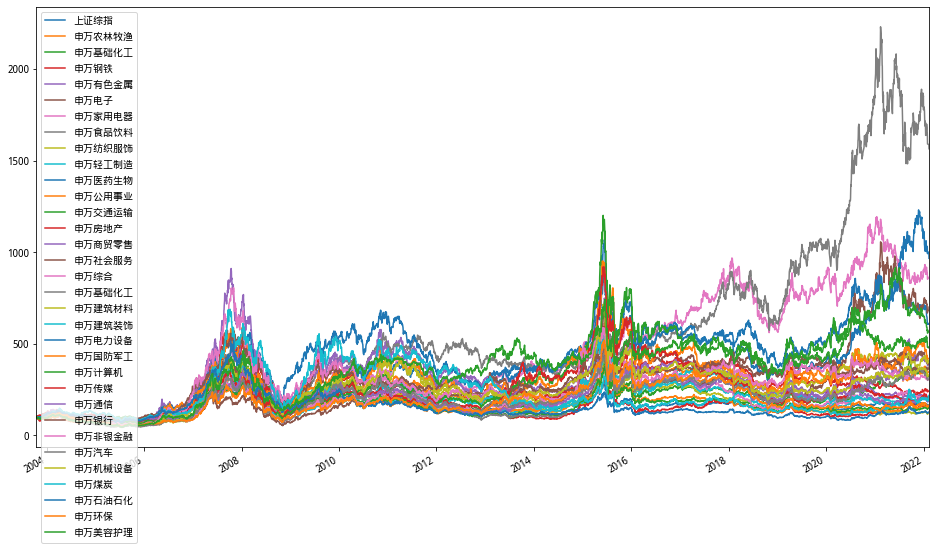

In [216]:
((1 + index_retx_df).cumprod()*100).plot()

In [217]:
industry_id_name_list = list(industry_id_name.values())

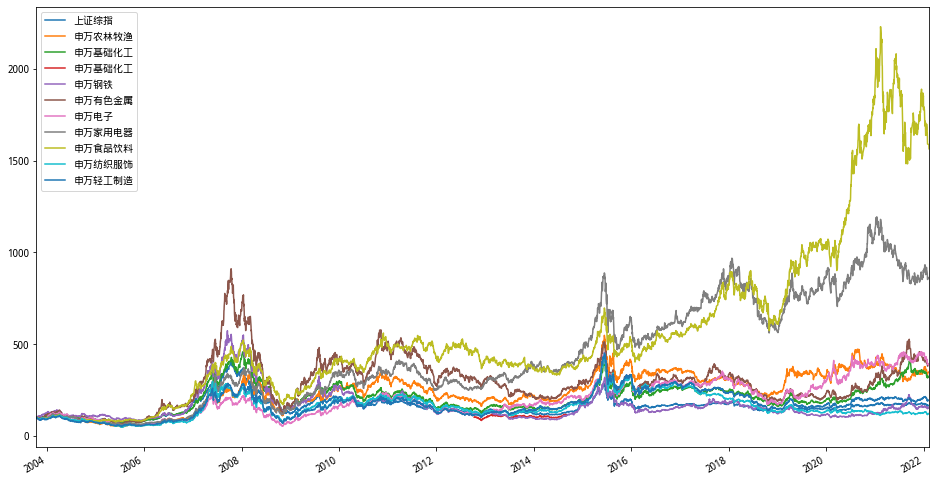

In [218]:
((1 + index_retx_df.loc[:,industry_id_name_list[0:10]]).cumprod()*100).plot()

食品饮料，家用电器

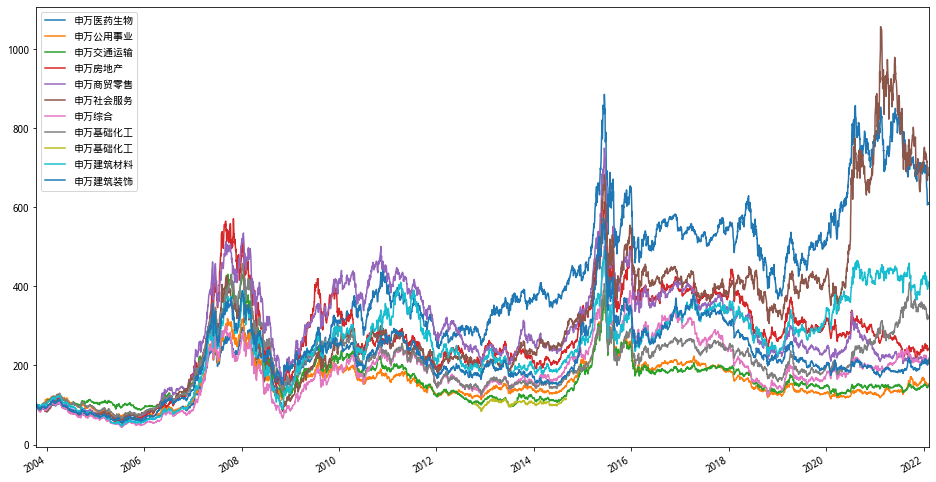

In [219]:
((1 + index_retx_df.loc[:,industry_id_name_list[10:20]]).cumprod()*100).plot()

社会服务，医药生物

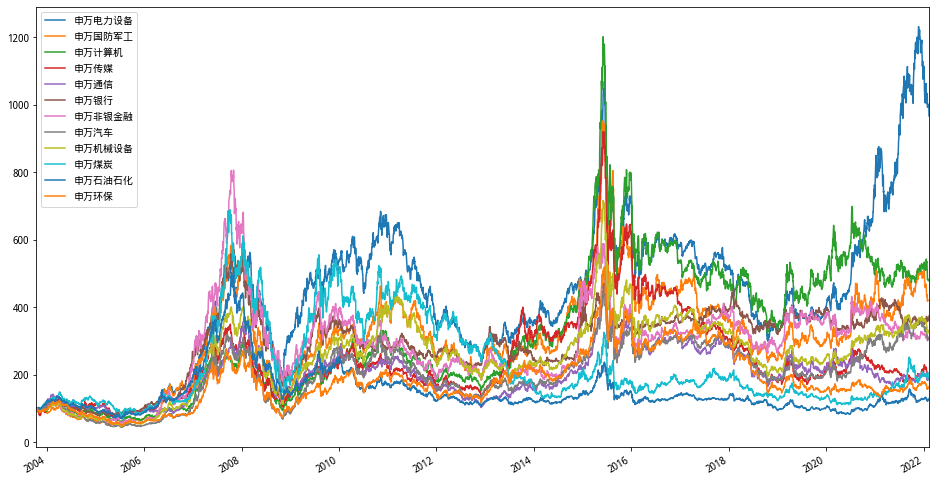

In [220]:
((1 + index_retx_df.loc[:,industry_id_name_list[20:32]]).cumprod()*100).plot()

电力设备

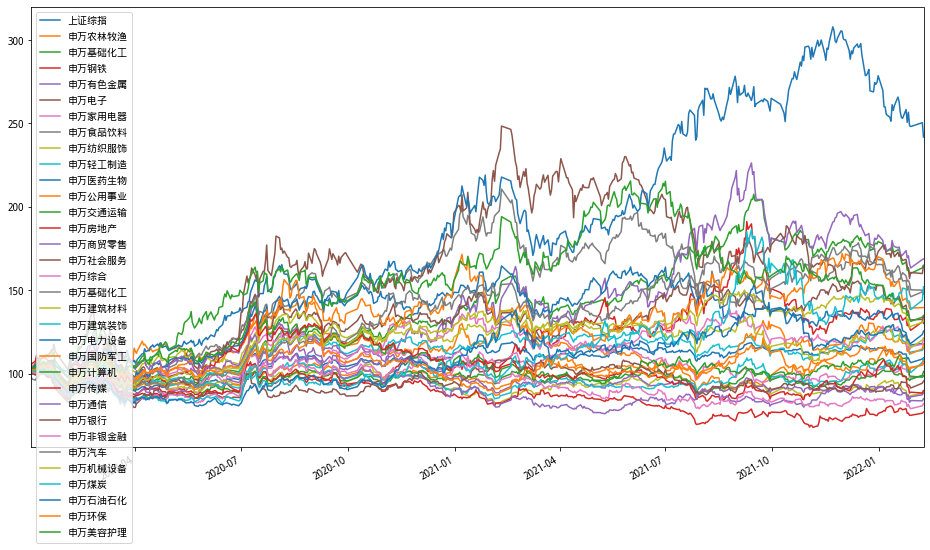

In [221]:
((1 + index_retx_df['2020':'2022']).cumprod()*100).plot()

#### 食品饮料, 家用电器，社会服务，医药生物，电力设备

In [222]:
cols = ['上证综指','申万食品饮料','申万家用电器','申万社会服务','申万医药生物','申万电力设备']

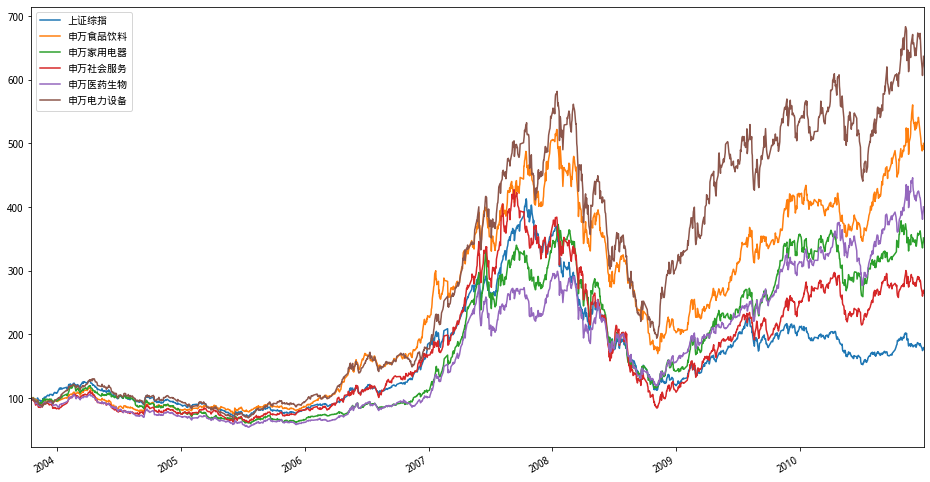

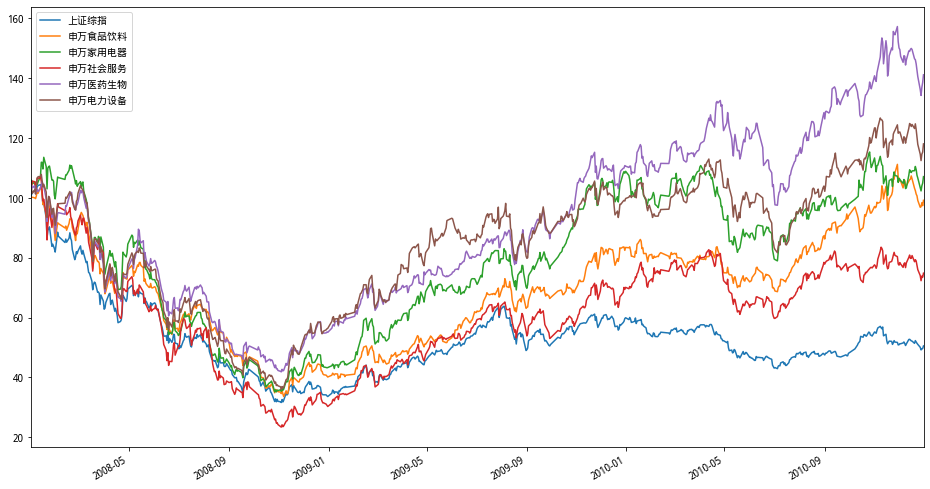

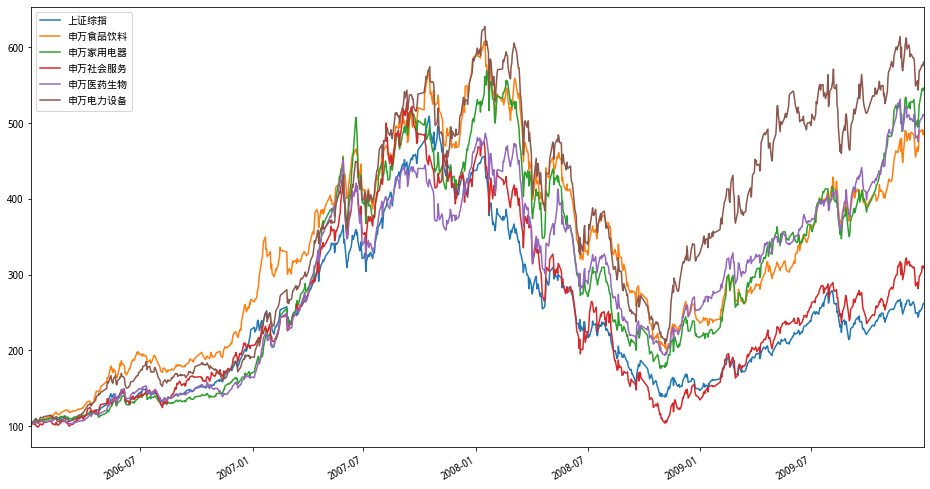

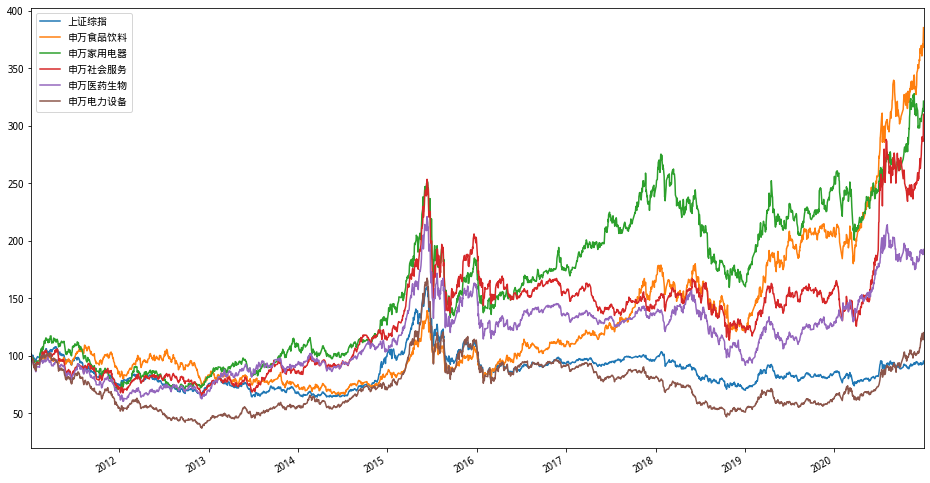

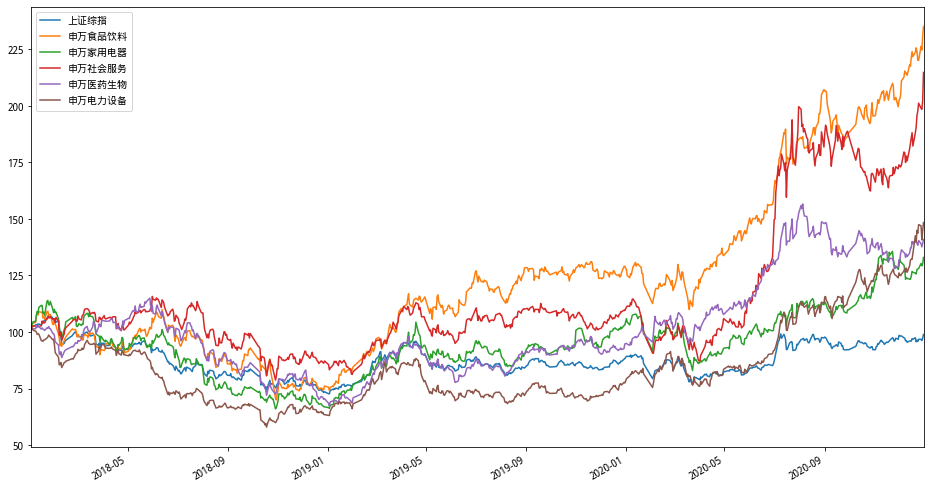

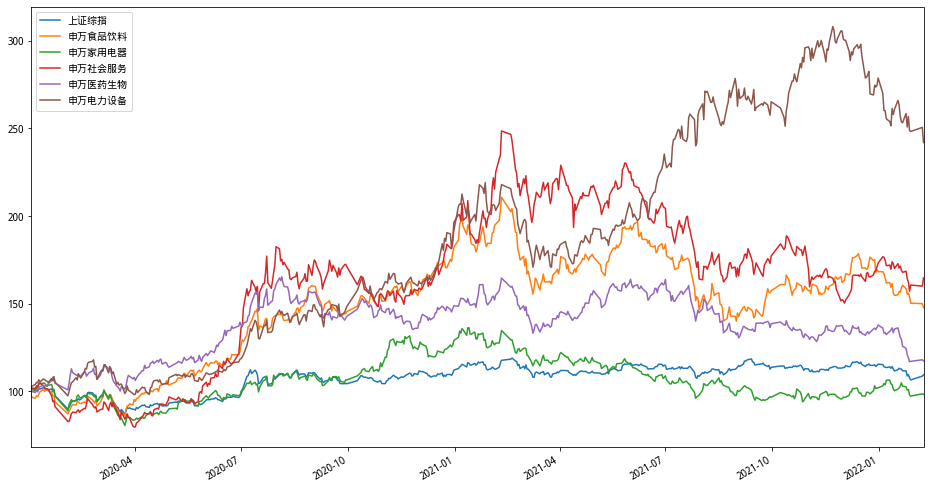

In [223]:
((1 + index_retx_df.loc['2003':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2008':'2010',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2006':'2009',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2011':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2018':'2020',cols]).cumprod()*100).plot()

((1 + index_retx_df.loc['2020':'2022',cols]).cumprod()*100).plot()

# Individual Stocks

观察以下几个指标：
- 股票数目
- 市值
- 成交额
- 换手率

按照以下几种分组：
- 沪深两市
- 板块
- 市值

In [224]:
# %%time
# stk_df = DataAPI.MktEqudAdjAfGet(secID=stk_id,beginDate="20150101",endDate="20221231",isOpen=1,
#                                            field=["secID","secShortName","exchangeCD","tradeDate",
#                                                   "preClosePrice","closePrice","turnoverVol",
#                                                   "turnoverValue","dealAmount","turnoverRate",
#                                                   "negMarketValue","marketValue"],pandas="1")

In [225]:
# stk_df.to_pickle('stk_df.pkl')

In [226]:
stk_df = pd.read_pickle('stk_df.pkl')

In [227]:
stk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006331 entries, 0 to 6006330
Data columns (total 12 columns):
secID             object
secShortName      object
exchangeCD        object
tradeDate         object
preClosePrice     float64
closePrice        float64
turnoverVol       int64
turnoverValue     float64
dealAmount        float64
turnoverRate      float64
negMarketValue    float64
marketValue       float64
dtypes: float64(7), int64(1), object(4)
memory usage: 549.9+ MB


In [228]:
stk_df['ret'] = stk_df['closePrice'] / stk_df['preClosePrice'] - 1

In [229]:
stk_df.head()

secID secShortName exchangeCD   tradeDate  preClosePrice  closePrice  \
0  000001.XSHE         平安银行       XSHE  2015-01-05       1293.044    1307.737   
1  000001.XSHE         平安银行       XSHE  2015-01-06       1307.737    1288.146   
2  000001.XSHE         平安银行       XSHE  2015-01-07       1288.146    1263.656   
3  000001.XSHE         平安银行       XSHE  2015-01-08       1263.656    1221.208   
4  000001.XSHE         平安银行       XSHE  2015-01-09       1221.208    1231.004   

   turnoverVol  turnoverValue  dealAmount  turnoverRate  negMarketValue  \
0      4966040   4.565388e+09     92478.0        0.0291    1.575841e+11   
1      3761152   3.453446e+09     80325.0        0.0220    1.552233e+11   
2      2951601   2.634796e+09     72697.0        0.0173    1.522723e+11   
3      2443951   2.128003e+09     68734.0        0.0143    1.471572e+11   
4      4355039   3.835378e+09     99882.0        0.0255    1.483376e+11   

    marketValue       ret  
0  1.830268e+11  0.011363  
1  1.802848e+11 -0.014981  
2  1.768574e+11 -0.019012  
3  1.709164e+11 -0.033591  
4  1.722874e+11  0.008022

In [230]:
sec_sector = DataAPI.EquGet(secID=stk_id,field=["secID","ListSector"],pandas="1")

In [231]:
# industry = DataAPI.EquIndustryGet(secID=stk_id,industryVersionCD="010303",field=['secID','industryName1',''],pandas="1")

# industry['industryName1'].unique()

# industry.drop_duplicates()

In [232]:
stk_df = pd.merge(stk_df, sec_sector, on="secID")

In [233]:
stk_df

secID secShortName exchangeCD   tradeDate  preClosePrice  \
0        000001.XSHE         平安银行       XSHE  2015-01-05       1293.044   
1        000001.XSHE         平安银行       XSHE  2015-01-06       1307.737   
2        000001.XSHE         平安银行       XSHE  2015-01-07       1288.146   
3        000001.XSHE         平安银行       XSHE  2015-01-08       1263.656   
4        000001.XSHE         平安银行       XSHE  2015-01-09       1221.208   
5        000001.XSHE         平安银行       XSHE  2015-01-12       1231.004   
6        000001.XSHE         平安银行       XSHE  2015-01-13       1205.698   
7        000001.XSHE         平安银行       XSHE  2015-01-14       1198.351   
8        000001.XSHE         平安银行       XSHE  2015-01-15       1208.963   
9        000001.XSHE         平安银行       XSHE  2015-01-16       1253.044   
10       000001.XSHE         平安银行       XSHE  2015-01-19       1254.677   
11       000001.XSHE         平安银行       XSHE  2015-01-20       1128.964   
12       000001.XSHE         平安银行       XSHE  2015-01-21       1128.964   
13       000001.XSHE         平安银行       XSHE  2015-01-22       1177.127   
14       000001.XSHE         平安银行       XSHE  2015-01-23       1167.331   
15       000001.XSHE         平安银行       XSHE  2015-01-26       1175.494   
16       000001.XSHE         平安银行       XSHE  2015-01-27       1170.596   
17       000001.XSHE         平安银行       XSHE  2015-01-28       1142.025   
18       000001.XSHE         平安银行       XSHE  2015-01-29       1147.739   
19       000001.XSHE         平安银行       XSHE  2015-01-30       1134.678   
20       000001.XSHE         平安银行       XSHE  2015-02-02       1137.127   
21       000001.XSHE         平安银行       XSHE  2015-02-03       1112.638   
22       000001.XSHE         平安银行       XSHE  2015-02-04       1138.760   
23       000001.XSHE         平安银行       XSHE  2015-02-05       1119.168   
24       000001.XSHE         平安银行       XSHE  2015-02-06       1125.699   
25       000001.XSHE         平安银行       XSHE  2015-02-09       1102.842   
26       000001.XSHE         平安银行       XSHE  2015-02-10       1103.658   
27       000001.XSHE         平安银行       XSHE  2015-02-11       1124.066   
28       000001.XSHE         平安银行       XSHE  2015-02-12       1120.801   
29       000001.XSHE         平安银行       XSHE  2015-02-13       1131.413   
...              ...          ...        ...         ...            ...   
6006301  900957.XSHG         凌云B股       XSHG  2022-01-11          0.645   
6006302  900957.XSHG         凌云B股       XSHG  2022-01-12          0.645   
6006303  900957.XSHG         凌云B股       XSHG  2022-01-13          0.653   
6006304  900957.XSHG         凌云B股       XSHG  2022-01-14          0.648   
6006305  900957.XSHG         凌云B股       XSHG  2022-01-17          0.650   
6006306  900957.XSHG         凌云B股       XSHG  2022-01-18          0.650   
6006307  900957.XSHG         凌云B股       XSHG  2022-01-19          0.651   
6006308  900957.XSHG         凌云B股       XSHG  2022-01-20          0.652   
6006309  900957.XSHG         凌云B股       XSHG  2022-01-21          0.642   
6006310  900957.XSHG         凌云B股       XSHG  2022-01-24          0.643   
6006311  900957.XSHG         凌云B股       XSHG  2022-01-25          0.626   
6006312  900957.XSHG         凌云B股       XSHG  2022-01-26          0.616   
6006313  900957.XSHG         凌云B股       XSHG  2022-01-27          0.619   
6006314  900957.XSHG         凌云B股       XSHG  2022-01-28          0.617   
6006315  900957.XSHG         凌云B股       XSHG  2022-02-07          0.622   
6006316  900957.XSHG         凌云B股       XSHG  2022-02-08          0.629   
6006317  900957.XSHG         凌云B股       XSHG  2022-02-09          0.630   
6006318  900957.XSHG         凌云B股       XSHG  2022-02-10          0.629   
6006319  900957.XSHG         凌云B股       XSHG  2022-02-11          0.626   
6006320  900957.XSHG         凌云B股       XSHG  2022-02-14          0.629   
6006321  900957.XSHG         凌云B股       XSHG  2022-02-15          0.623   
6006322  900957.XSHG         凌云B股       

In [234]:
stk_df['tradeDate'] = pd.to_datetime(stk_df['tradeDate'], format='%Y-%m-%d')

In [235]:
stk_df.set_index(['secID','tradeDate'],inplace=True)

In [236]:
stk_df['yearMonth'] = stk_df.index.get_level_values(1).to_period('M') # Change to Month

In [237]:
stk_df

secShortName exchangeCD  preClosePrice  closePrice  \
secID       tradeDate                                                       
000001.XSHE 2015-01-05         平安银行       XSHE       1293.044    1307.737   
            2015-01-06         平安银行       XSHE       1307.737    1288.146   
            2015-01-07         平安银行       XSHE       1288.146    1263.656   
            2015-01-08         平安银行       XSHE       1263.656    1221.208   
            2015-01-09         平安银行       XSHE       1221.208    1231.004   
            2015-01-12         平安银行       XSHE       1231.004    1205.698   
            2015-01-13         平安银行       XSHE       1205.698    1198.351   
            2015-01-14         平安银行       XSHE       1198.351    1208.963   
            2015-01-15         平安银行       XSHE       1208.963    1253.044   
            2015-01-16         平安银行       XSHE       1253.044    1254.677   
            2015-01-19         平安银行       XSHE       1254.677    1128.964   
            2015-01-20         平安银行       XSHE       1128.964    1128.964   
            2015-01-21         平安银行       XSHE       1128.964    1177.127   
            2015-01-22         平安银行       XSHE       1177.127    1167.331   
            2015-01-23         平安银行       XSHE       1167.331    1175.494   
            2015-01-26         平安银行       XSHE       1175.494    1170.596   
            2015-01-27         平安银行       XSHE       1170.596    1142.025   
            2015-01-28         平安银行       XSHE       1142.025    1147.739   
            2015-01-29         平安银行       XSHE       1147.739    1134.678   
            2015-01-30         平安银行       XSHE       1134.678    1137.127   
            2015-02-02         平安银行       XSHE       1137.127    1112.638   
            2015-02-03         平安银行       XSHE       1112.638    1138.760   
            2015-02-04         平安银行       XSHE       1138.760    1119.168   
            2015-02-05         平安银行       XSHE       1119.168    1125.699   
            2015-02-06         平安银行       XSHE       1125.699    1102.842   
            2015-02-09         平安银行       XSHE       1102.842    1103.658   
            2015-02-10         平安银行       XSHE       1103.658    1124.066   
            2015-02-11         平安银行       XSHE       1124.066    1120.801   
            2015-02-12         平安银行       XSHE       1120.801    1131.413   
            2015-02-13         平安银行       XSHE       1131.413    1138.760   
...                             ...        ...            ...         ...   
900957.XSHG 2022-01-11         凌云B股       XSHG          0.645       0.645   
            2022-01-12         凌云B股       XSHG          0.645       0.653   
            2022-01-13         凌云B股       XSHG          0.653       0.648   
            2022-01-14         凌云B股       XSHG          0.648       0.650   
            2022-01-17         凌云B股       XSHG          0.650       0.650   
            2022-01-18         凌云B股       XSHG          0.650       0.651   
            2022-01-19         凌云B股       XSHG          0.651       0.652   
            2022-01-20         凌云B股       XSHG          0.652       0.642   
            2022-01-21         凌云B股       XSHG          0.642       0.643   
            2022-01-24         凌云B股       XSHG          0.643       0.626   
            2022-01-25         凌云B股       XSHG          0.626       0.616   
            2022-01-26         凌云B股       XSHG          0.616       0.619   
            2022-01-27         凌云B股       XSHG          0.619       0.617   
            2022-01-28         凌云B股       XSHG          0.617       0.622   
            2022-02-07         凌云B股       XSHG          0.622       0.629   
            2022-02-08         凌云B股       XSHG          0.629       0.630   
            2022-02-09         凌云B股       XSHG          0.630       0.629   
            2022-02-10         凌云B股       XSHG          0.629       0.626   
            2022-02-11         凌云B股       XSHG          0.626       0.629   
            2022-02

In [238]:
q33 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.33)
q67 = stk_df.groupby(['yearMonth'])['negMarketValue'].quantile(0.67)

In [239]:
q33.name = 'negMarketValue_q33'
q67.name = 'negMarketValue_q67'

In [240]:
stk_df = pd.merge(stk_df,q33,on='yearMonth')
stk_df = pd.merge(stk_df,q67,on='yearMonth')

In [241]:
stk_df['size'] = 'small'

stk_df.loc[(stk_df['negMarketValue'] > stk_df['negMarketValue_q33']) & (stk_df['negMarketValue'] <= stk_df['negMarketValue_q67']), 'size'] = 'medium'

stk_df.loc[stk_df['negMarketValue'] > stk_df['negMarketValue_q67'], 'size'] = 'large'

In [242]:
stk_df

secShortName exchangeCD  preClosePrice  closePrice  turnoverVol  \
0               平安银行       XSHE       1293.044    1307.737      4966040   
1               平安银行       XSHE       1307.737    1288.146      3761152   
2               平安银行       XSHE       1288.146    1263.656      2951601   
3               平安银行       XSHE       1263.656    1221.208      2443951   
4               平安银行       XSHE       1221.208    1231.004      4355039   
5               平安银行       XSHE       1231.004    1205.698      2696688   
6               平安银行       XSHE       1205.698    1198.351      1418187   
7               平安银行       XSHE       1198.351    1208.963      2192762   
8               平安银行       XSHE       1208.963    1253.044      2156548   
9               平安银行       XSHE       1253.044    1254.677      2701125   
10              平安银行       XSHE       1254.677    1128.964      3710288   
11              平安银行       XSHE       1128.964    1128.964      2588576   
12              平安银行       XSHE       1128.964    1177.127      3368980   
13              平安银行       XSHE       1177.127    1167.331      2178850   
14              平安银行       XSHE       1167.331    1175.494      2533304   
15              平安银行       XSHE       1175.494    1170.596      1836123   
16              平安银行       XSHE       1170.596    1142.025      2325514   
17              平安银行       XSHE       1142.025    1147.739      2154303   
18              平安银行       XSHE       1147.739    1134.678      1765198   
19              平安银行       XSHE       1134.678    1137.127      1614788   
20               万科A       XSHE       1567.420    1681.312     11835160   
21               万科A       XSHE       1681.312    1619.292      6036510   
22               万科A       XSHE       1619.292    1604.632      4766024   
23               万科A       XSHE       1604.632    1532.463      4761231   
24               万科A       XSHE       1532.463    1516.676      5943135   
25               万科A       XSHE       1516.676    1479.464      4394942   
26               万科A       XSHE       1479.464    1473.826      3002808   
27               万科A       XSHE       1473.826    1477.209      2970712   
28               万科A       XSHE       1477.209    1552.761      4382937   
29               万科A       XSHE       1552.761    1524.570      3841384   
...              ...        ...            ...         ...          ...   
6006301       *ST海创B       XSHG          0.396       0.386       211633   
6006302       *ST海创B       XSHG          0.386       0.393       145367   
6006303       *ST海创B       XSHG          0.393       0.386        95400   
6006304       *ST海创B       XSHG          0.386       0.389       129733   
6006305       *ST海创B       XSHG          0.389       0.389        50167   
6006306       *ST海创B       XSHG          0.389       0.386        91650   
6006307       *ST海创B       XSHG          0.386       0.379       121083   
6006308       *ST海创B       XSHG          0.379       0.389       117350   
6006309       *ST海创B       XSHG          0.389       0.382        45667   
6006310       *ST海创B       XSHG          0.382       0.375        53917   
6006311       *ST海创B       XSHG          0.375       0.379        37033   
6006312       *ST海创B       XSHG          0.379       0.389       206997   
6006313       *ST海创B       XSHG          0.389       0.386        49367   
6006314       *ST海创B       XSHG          0.386       0.407       271119   
6006315         凌云B股       XSHG          0.622       0.629       119200   
6006316         凌云B股       XSHG          0.629       0.630       161700   
6006317         凌云B股       XSHG          0.630       0.629       173600   
6006318         凌云B股       XSHG          0.629       0.626        67200   
6006319         凌云B股       XSHG          0.626       0.629       179500   
6006320         凌云B股       XSHG          0.629       0.623       193900   
6006321         凌云B股       XSHG          0.623       0.622        76700   
6006322         凌云B股       XSHG  

## 股票数目

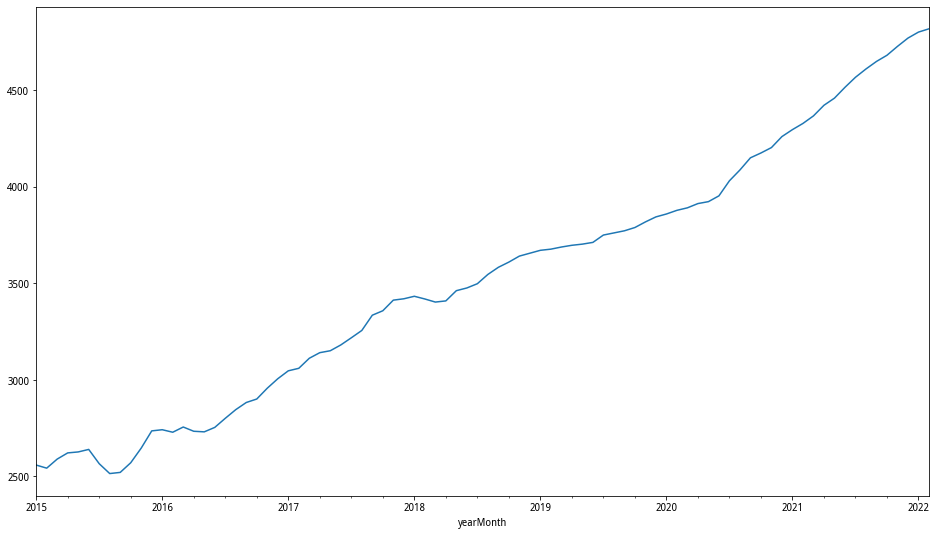

In [243]:
stk_df.groupby('yearMonth')['secShortName'].nunique().plot()

In [244]:
n_stk_by_list = stk_df.groupby(['ListSector','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='ListSector',values='secShortName')

In [245]:
n_stk_by_list

ListSector      主板     创业板   北交所    科创板
yearMonth                              
2015-01     2173.0   386.0   NaN    NaN
2015-02     2150.0   393.0   NaN    NaN
2015-03     2189.0   401.0   NaN    NaN
2015-04     2207.0   415.0   NaN    NaN
2015-05     2205.0   422.0   NaN    NaN
2015-06     2195.0   445.0   NaN    NaN
2015-07     2138.0   428.0   NaN    NaN
2015-08     2104.0   411.0   NaN    NaN
2015-09     2100.0   421.0   NaN    NaN
2015-10     2136.0   435.0   NaN    NaN
2015-11     2194.0   453.0   NaN    NaN
2015-12     2273.0   463.0   NaN    NaN
2016-01     2283.0   459.0   NaN    NaN
2016-02     2273.0   456.0   NaN    NaN
2016-03     2289.0   467.0   NaN    NaN
2016-04     2277.0   457.0   NaN    NaN
2016-05     2269.0   462.0   NaN    NaN
2016-06     2285.0   469.0   NaN    NaN
2016-07     2326.0   475.0   NaN    NaN
2016-08     2357.0   489.0   NaN    NaN
2016-09     2377.0   506.0   NaN    NaN
2016-10     2391.0   510.0   NaN    NaN
2016-11     2431.0   526.0   NaN    NaN
2016-12     2461.0   545.0   NaN    NaN
2017-01     2485.0   562.0   NaN    NaN
2017-02     2486.0   574.0   NaN    NaN
2017-03     2524.0   588.0   NaN    NaN
2017-04     2547.0   594.0   NaN    NaN
2017-05     2559.0   592.0   NaN    NaN
2017-06     2575.0   606.0   NaN    NaN
...            ...     ...   ...    ...
2019-09     2969.0   770.0   NaN   33.0
2019-10     2976.0   773.0   NaN   40.0
2019-11     2978.0   784.0   NaN   56.0
2019-12     2986.0   788.0   NaN   70.0
2020-01     2989.0   791.0   NaN   79.0
2020-02     2992.0   795.0   NaN   91.0
2020-03     2997.0   800.0   NaN   94.0
2020-04     3009.0   804.0   NaN  100.0
2020-05     3009.0   809.0   NaN  105.0
2020-06     3021.0   816.0   NaN  116.0
2020-07     3025.0   831.0  32.0  143.0
2020-08     3041.0   849.0  32.0  165.0
2020-09     3070.0   865.0  32.0  183.0
2020-10     3082.0   870.0  32.0  191.0
2020-11     3092.0   878.0  36.0  197.0
2020-12     3113.0   891.0  41.0  215.0
2021-01     3124.0   904.0  45.0  223.0
2021-02     3131.0   914.0  51.0  232.0
2021-03     3141.0   924.0  51.0  251.0
2021-04     3157.0   946.0  51.0  268.0
2021-05     3168.0   957.0  52.0  282.0
2021-06     3183.0   976.0  55.0  301.0
2021-07     3193.0   997.0  58.0  319.0
2021-08     3198.0  1015.0  66.0  331.0
2021-09     3206.0  1036.0  66.0  341.0
2021-10     3211.0  1050.0  68.0  352.0
2021-11     3218.0  1066.0  81.0  362.0
2021-12     3224.0  1090.0  79.0  377.0
2022-01     3229.0  1104.0  81.0  387.0
2022-02     3234.0  1110.0  83.0  391.0

[86 rows x 4 columns]

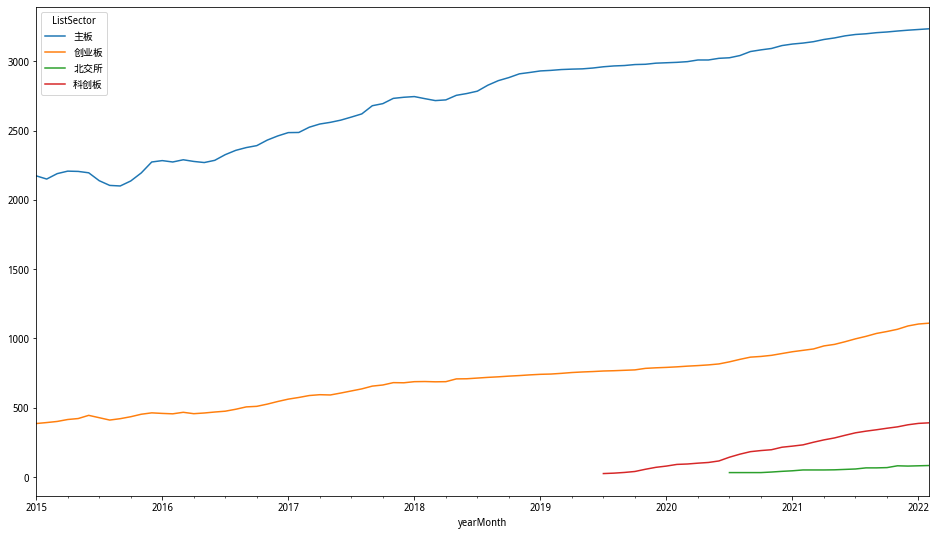

In [246]:
n_stk_by_list.plot()

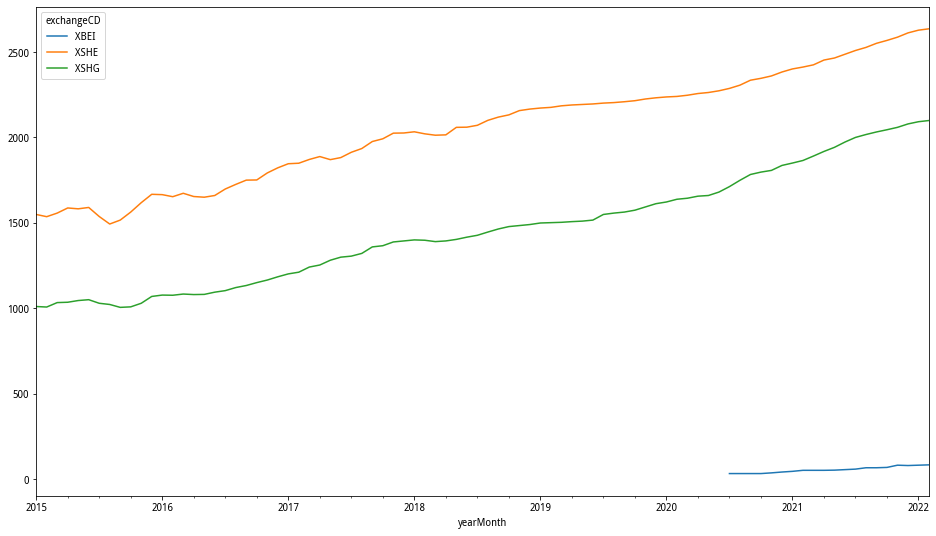

In [247]:
stk_df.groupby(['exchangeCD','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='secShortName').plot()

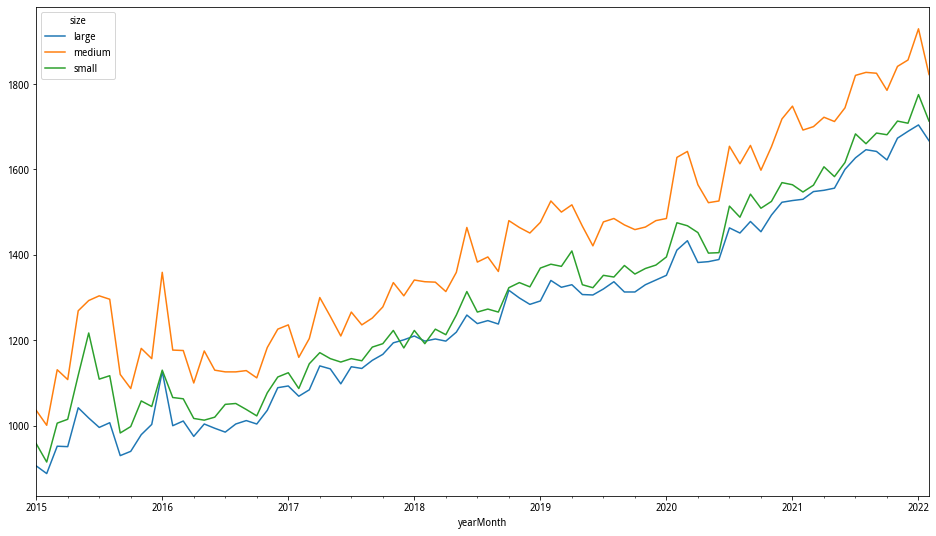

In [248]:
stk_df.groupby(['size','yearMonth'])['secShortName'].nunique().reset_index().pivot(index='yearMonth',columns='size',values='secShortName').plot()

## 总流通市值

In [249]:
stk_df.groupby(['yearMonth'])['negMarketValue'].sum()

yearMonth
2015-01    6.236083e+14
2015-02    4.629839e+14
2015-03    7.573072e+14
2015-04    8.678300e+14
2015-05    8.957988e+14
2015-06    1.019879e+15
2015-07    8.161057e+14
2015-08    7.264880e+14
2015-09    5.921474e+14
2015-10    5.588251e+14
2015-11    7.787120e+14
2015-12    8.852152e+14
2016-01    6.444686e+14
2016-02    4.861422e+14
2016-03    7.253909e+14
2016-04    6.661087e+14
2016-05    6.699067e+14
2016-06    6.652496e+14
2016-07    7.409014e+14
2016-08    8.274421e+14
2016-09    7.191661e+14
2016-10    5.906585e+14
2016-11    8.414070e+14
2016-12    8.290054e+14
2017-01    6.789997e+14
2017-02    6.957572e+14
2017-03    9.060301e+14
2017-04    7.000725e+14
2017-05    7.467194e+14
2017-06    8.315010e+14
               ...     
2019-09    9.095066e+14
2019-10    8.151571e+14
2019-11    9.528382e+14
2019-12    1.022496e+15
2020-01    7.889691e+14
2020-02    9.654100e+14
2020-03    1.041858e+15
2020-04    9.872845e+14
2020-05    8.693467e+14
2020-06    1.004190e+15
2020-0

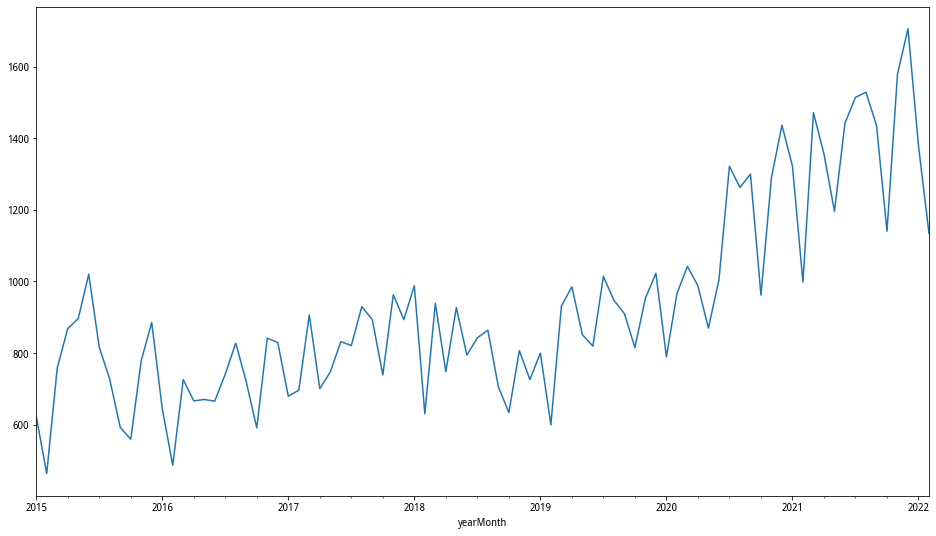

In [250]:
(stk_df.groupby(['yearMonth'])['negMarketValue'].sum() / 1e12).plot()

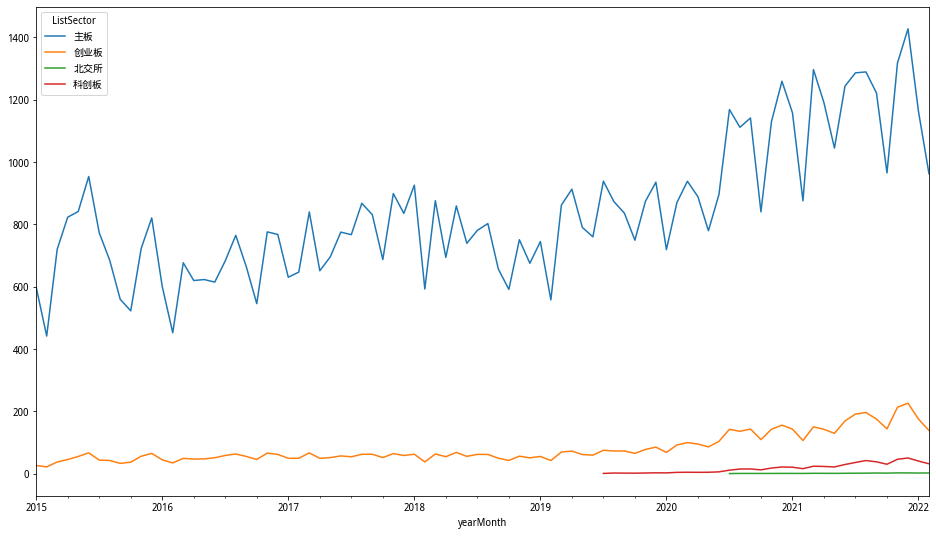

In [251]:
mkt_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='negMarketValue') / 1e12

mkt_value_by_sector.plot()

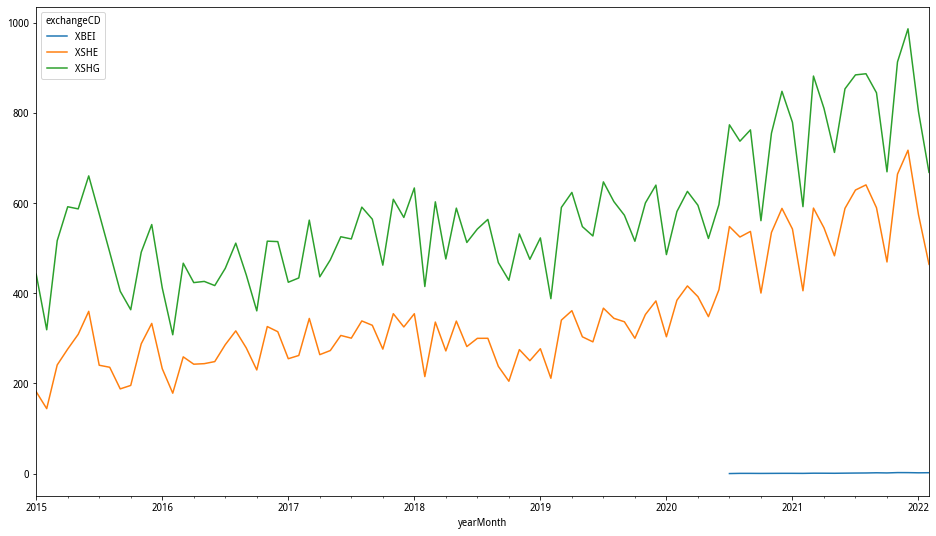

In [252]:
mkt_value_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

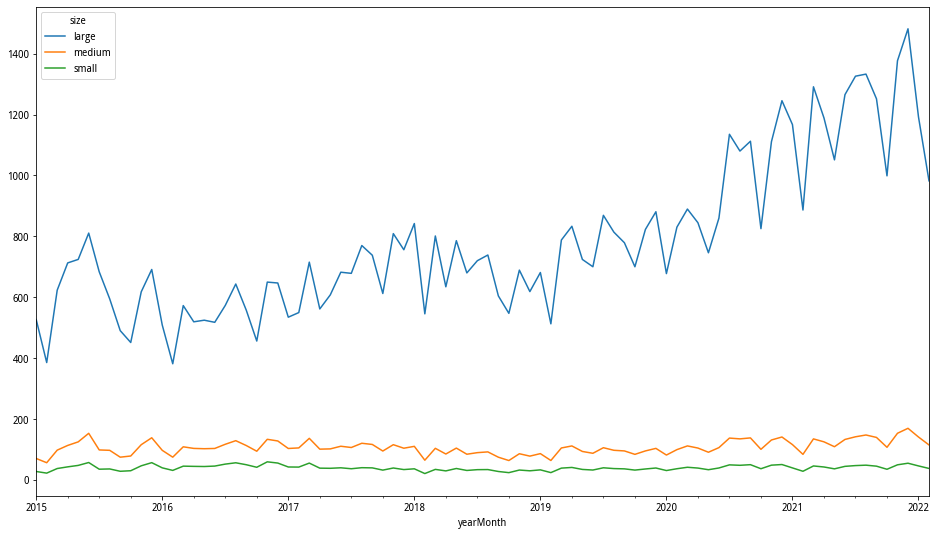

In [253]:
mkt_value_by_exch = stk_df.groupby(['size','yearMonth'])['negMarketValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='negMarketValue') / 1e12

mkt_value_by_exch.plot()

## 总成交额

In [254]:
stk_df.groupby(['yearMonth'])['turnoverValue'].sum()

yearMonth
2015-01    1.272445e+13
2015-02    7.547264e+12
2015-03    2.076448e+13
2015-04    2.995236e+13
2015-05    3.105382e+13
2015-06    3.652251e+13
2015-07    2.810343e+13
2015-08    2.047852e+13
2015-09    1.159642e+13
2015-10    1.503710e+13
2015-11    2.228763e+13
2015-12    1.818533e+13
2016-01    1.078722e+13
2016-02    7.791106e+12
2016-03    1.332727e+13
2016-04    1.138778e+13
2016-05    9.019809e+12
2016-06    1.140054e+13
2016-07    1.264326e+13
2016-08    1.112769e+13
2016-09    8.199903e+12
2016-10    7.671162e+12
2016-11    1.353906e+13
2016-12    9.731434e+12
2017-01    6.704952e+12
2017-02    8.029416e+12
2017-03    1.152956e+13
2017-04    9.169464e+12
2017-05    8.081149e+12
2017-06    8.452129e+12
               ...     
2019-09    1.130868e+13
2019-10    7.648883e+12
2019-11    8.491374e+12
2019-12    1.123901e+13
2020-01    1.119569e+13
2020-02    1.963373e+13
2020-03    1.904961e+13
2020-04    1.316042e+13
2020-05    1.119962e+13
2020-06    1.445812e+13
2020-0

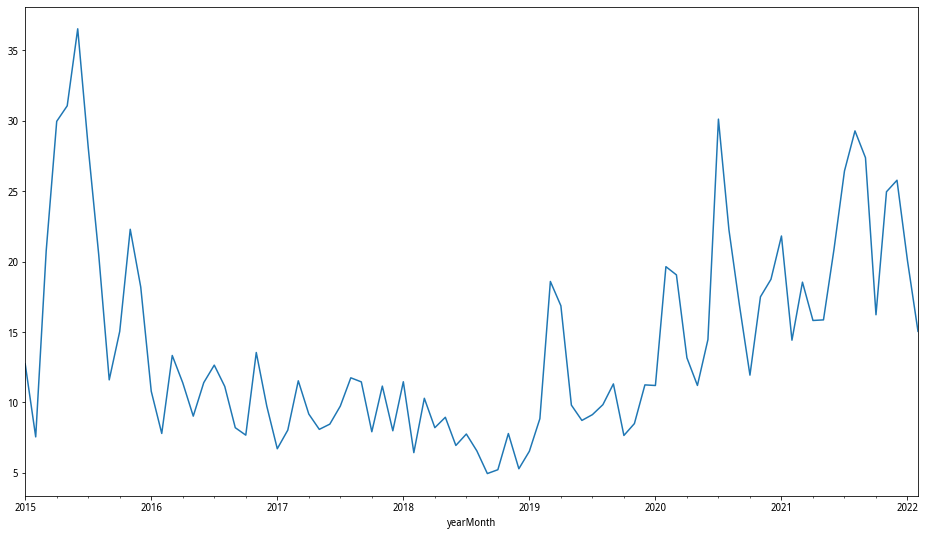

In [255]:
(stk_df.groupby(['yearMonth'])['turnoverValue'].sum() / 1e12).plot()

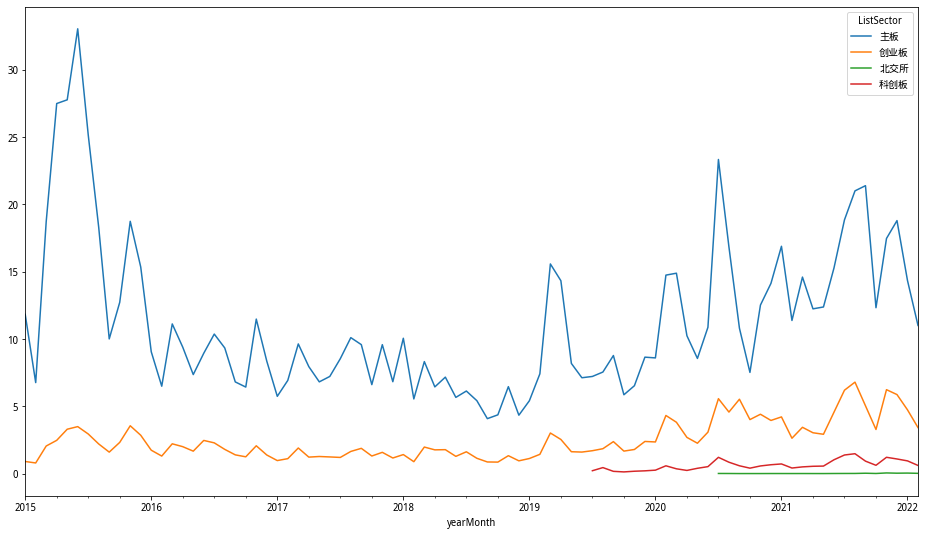

In [256]:
turnover_value_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

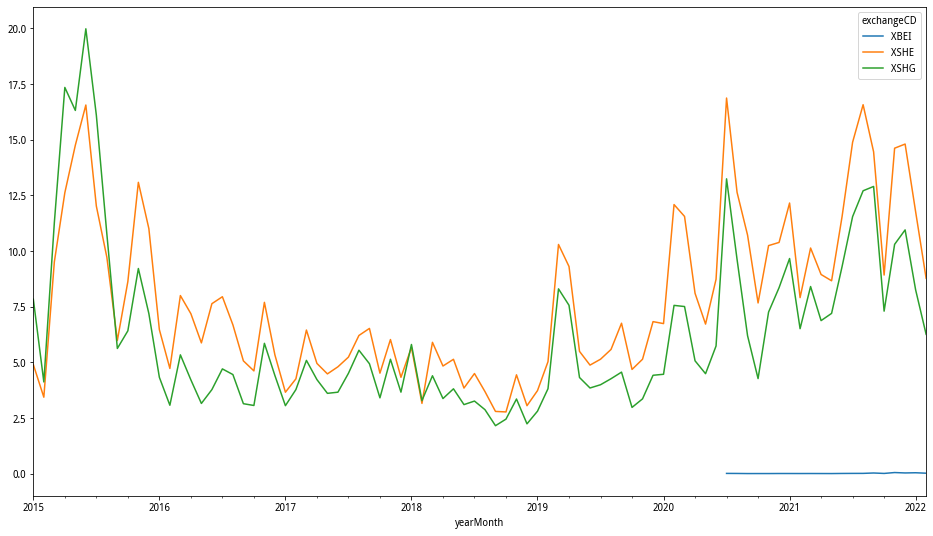

In [257]:
turnover_value_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

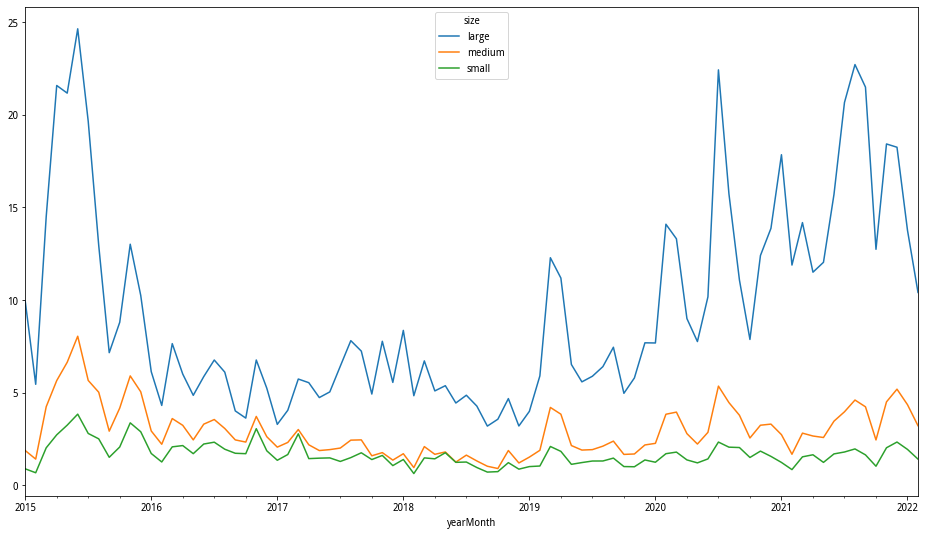

In [258]:
turnover_value_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverValue'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverValue') / 1e12

turnover_value_by_sector.plot()

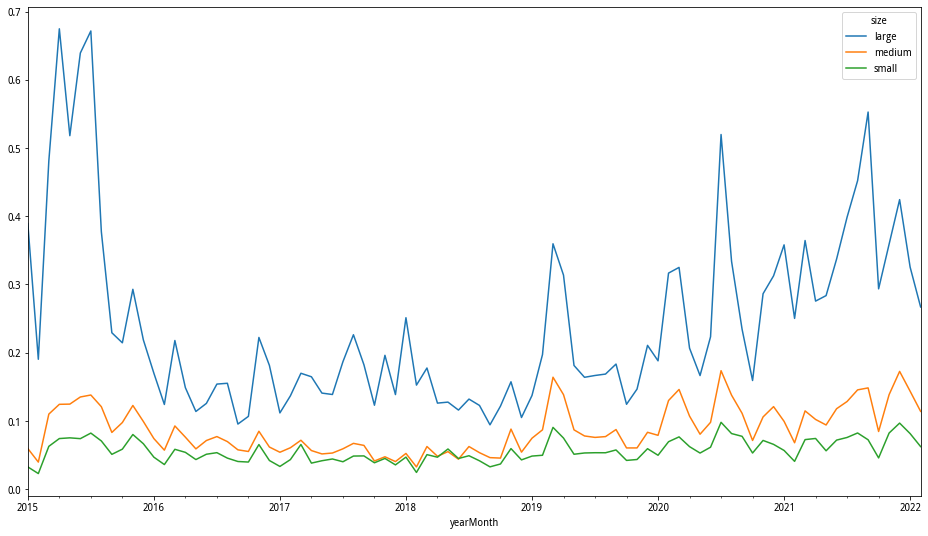

In [259]:
turnover_vol_by_sector = stk_df.groupby(['size','yearMonth'])['turnoverVol'].sum().reset_index().pivot(index='yearMonth',columns='size',values='turnoverVol') / 1e12

turnover_vol_by_sector.plot()

## 平均换手率

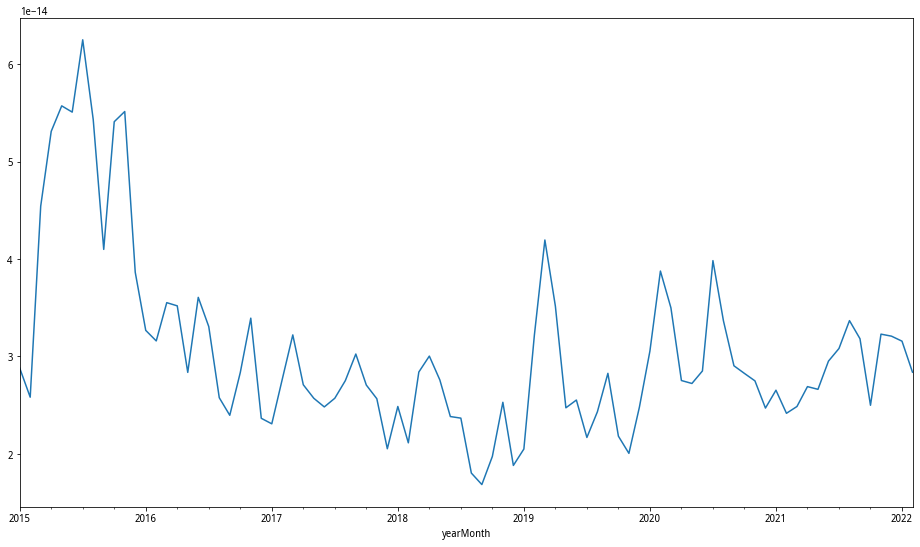

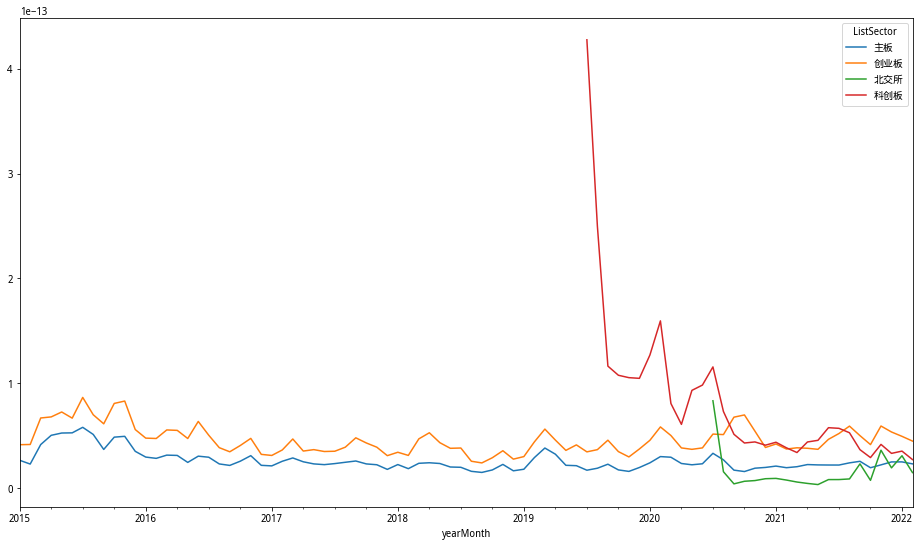

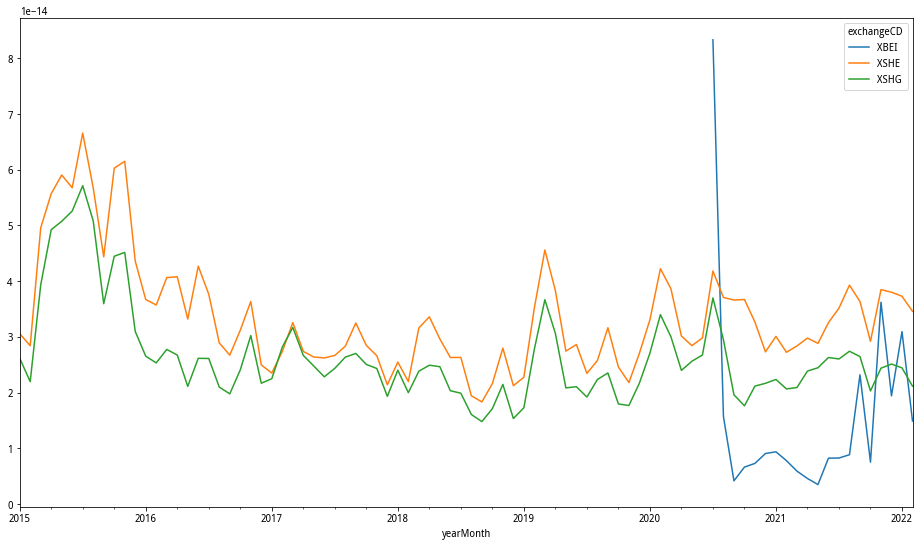

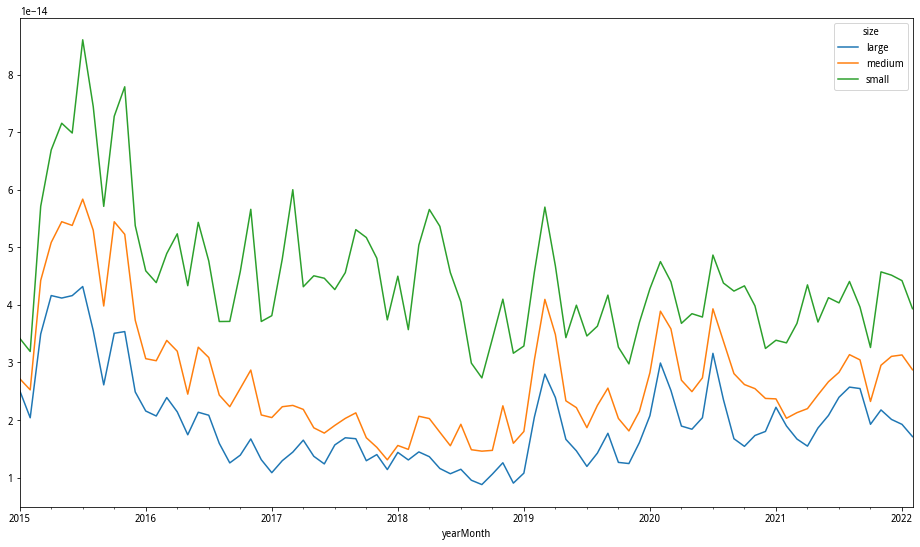

In [260]:
stk_df.groupby(['yearMonth'])['turnoverRate'].mean()

(stk_df.groupby(['yearMonth'])['turnoverRate'].mean() / 1e12).plot()

turnover_by_sector = stk_df.groupby(['ListSector','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_sector = stk_df.groupby(['exchangeCD','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='turnoverRate') / 1e12

turnover_by_sector.plot()

turnover_by_size = stk_df.groupby(['size','yearMonth'])['turnoverRate'].mean().reset_index().pivot(index='yearMonth',columns='size',values='turnoverRate') / 1e12

turnover_by_size.plot()

## 平均收益率

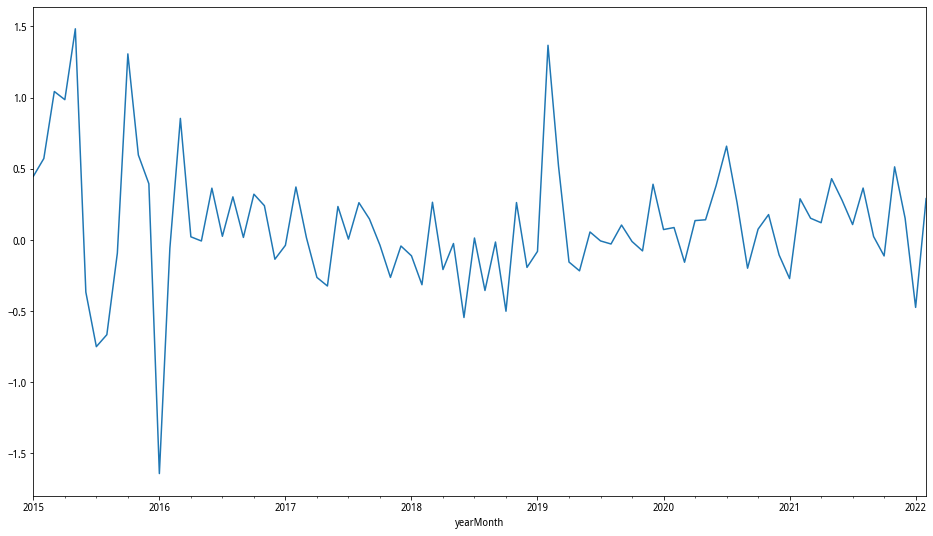

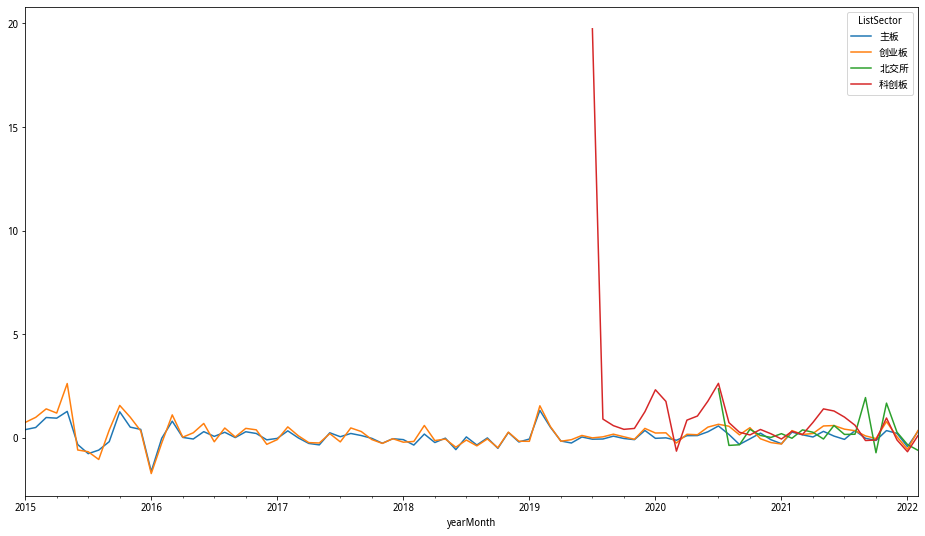

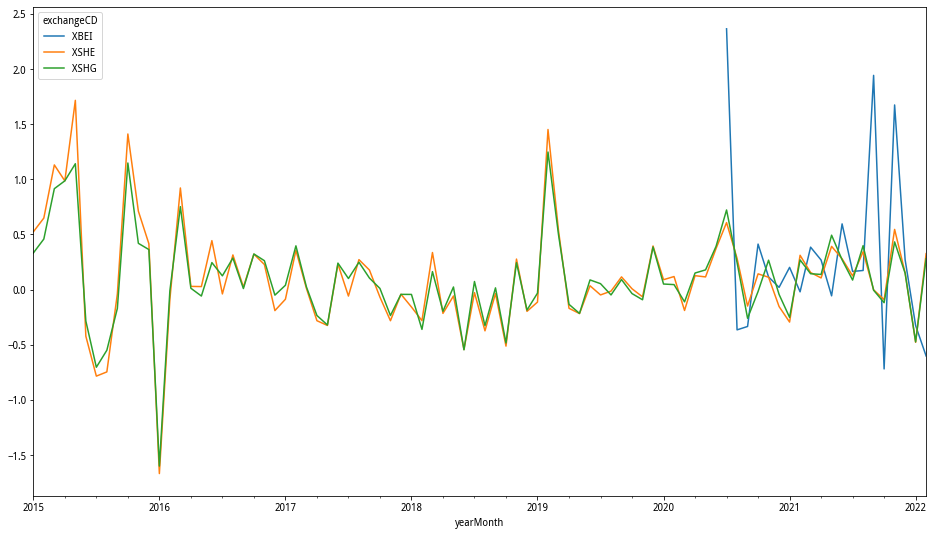

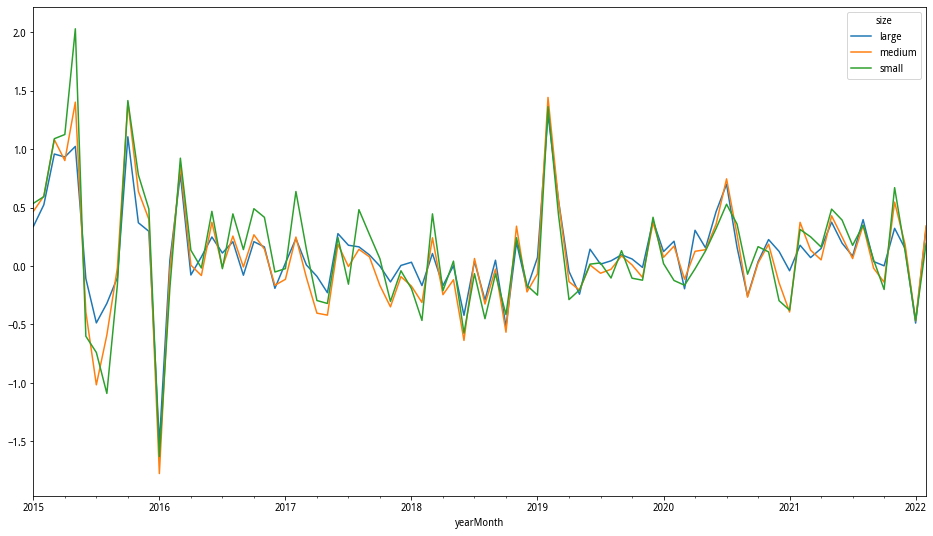

In [261]:
stk_df.groupby(['yearMonth'])['ret'].mean()

(stk_df.groupby(['yearMonth'])['ret'].mean() * 100).plot()

ret_by_sector = stk_df.groupby(['ListSector','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='ret') * 100

ret_by_sector.plot()

ret_by_exch = stk_df.groupby(['exchangeCD','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='ret') * 100

ret_by_exch.plot()

ret_by_size = stk_df.groupby(['size','yearMonth'])['ret'].mean().reset_index().pivot(index='yearMonth',columns='size',values='ret') * 100

ret_by_size.plot()

## 波动率

In [262]:
stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean()

yearMonth
2015-01    0.030013
2015-02    0.025414
2015-03    0.030567
2015-04    0.039674
2015-05    0.045820
2015-06    0.058727
2015-07    0.071463
2015-08    0.065110
2015-09    0.054497
2015-10    0.041630
2015-11    0.039245
2015-12    0.032278
2016-01    0.054086
2016-02    0.042254
2016-03    0.033928
2016-04    0.028272
2016-05    0.030035
2016-06    0.027554
2016-07    0.024443
2016-08    0.020596
2016-09    0.020611
2016-10    0.019740
2016-11    0.020608
2016-12    0.024468
2017-01    0.024469
2017-02    0.018546
2017-03    0.020184
2017-04    0.026278
2017-05    0.024994
2017-06    0.022302
             ...   
2019-09    0.023632
2019-10    0.023304
2019-11    0.020757
2019-12    0.020579
2020-01    0.026030
2020-02    0.043657
2020-03    0.033983
2020-04    0.028588
2020-05    0.024990
2020-06    0.025522
2020-07    0.039800
2020-08    0.035428
2020-09    0.034302
2020-10    0.029002
2020-11    0.026687
2020-12    0.029408
2021-01    0.033625
2021-02    0.034381
2021-03   

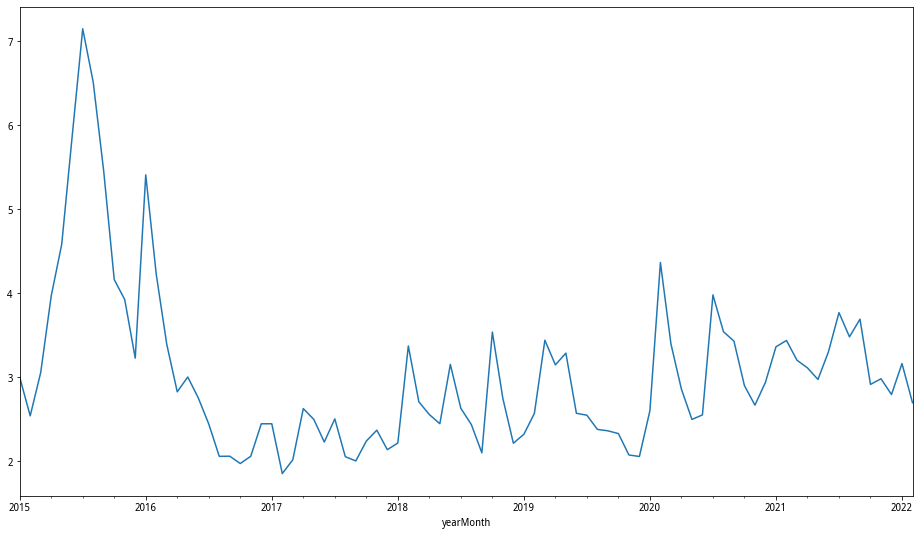

In [263]:
(stk_df.groupby(['yearMonth','secShortName'])['ret'].std().groupby('yearMonth').mean() * 100).plot()

In [264]:
vol = stk_df.groupby(['yearMonth','secShortName'])['ret'].std()

In [265]:
temp = stk_df[['secShortName','yearMonth','ListSector','exchangeCD','size']].drop_duplicates(['secShortName','yearMonth'])

In [266]:
vol = pd.merge(vol,temp,on=['secShortName','yearMonth'])

In [267]:
vol.rename(columns={'ret':'vol'},inplace=True)

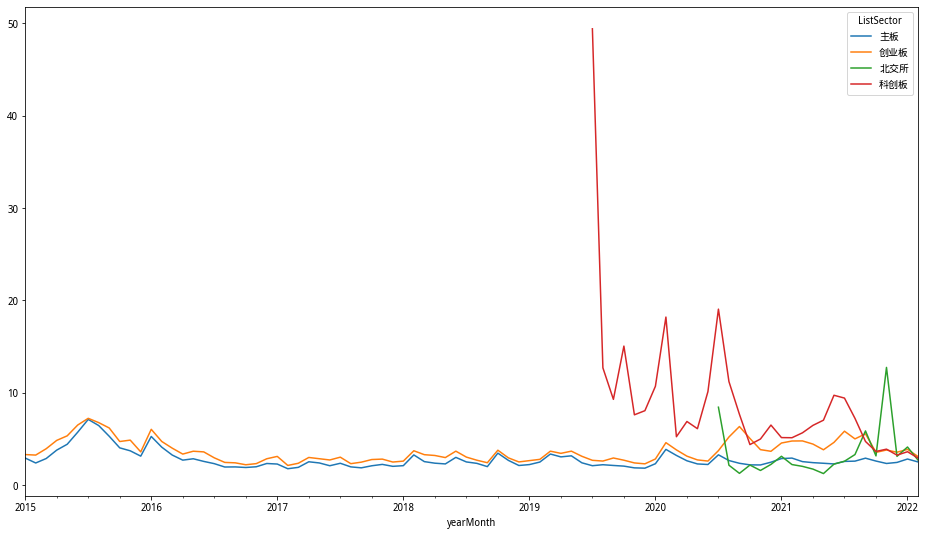

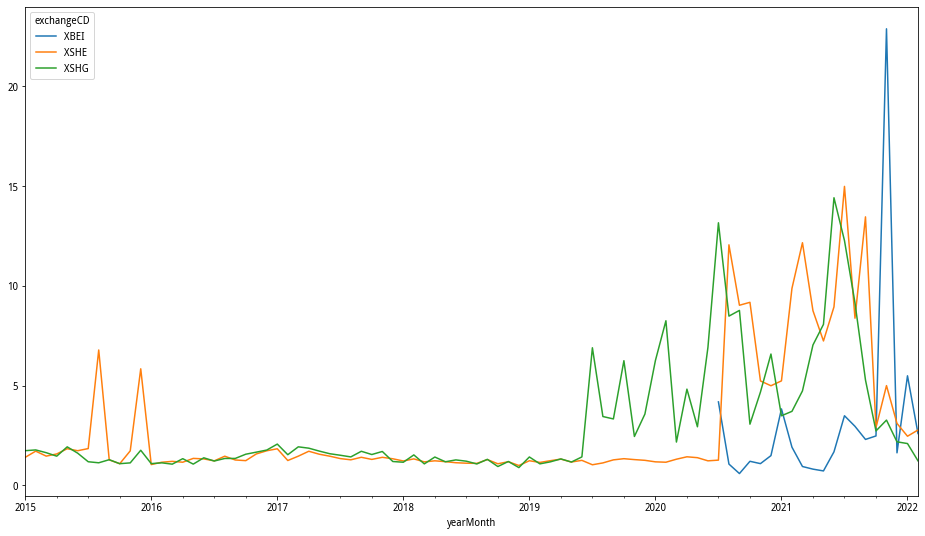

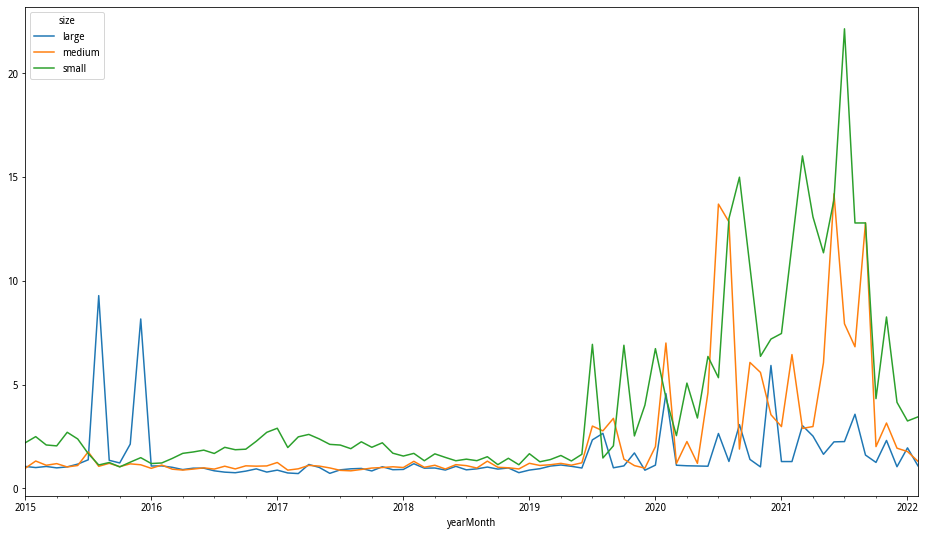

In [268]:
vol_by_sector = vol.groupby(['ListSector','yearMonth'])['vol'].mean().reset_index().pivot(index='yearMonth',columns='ListSector',values='vol') * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['exchangeCD','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='exchangeCD',values='vol') * 100

vol_by_sector.plot()

vol_by_sector = vol.groupby(['size','yearMonth'])['vol'].std().reset_index().pivot(index='yearMonth',columns='size',values='vol') * 100

vol_by_sector.plot()

## 所有在一起

In [269]:
group = stk_df.groupby(['yearMonth'])[['negMarketValue','turnoverValue','turnoverRate','ret']].agg({'negMarketValue':'sum','turnoverValue':'sum',
                                                                                                    'turnoverRate':'mean','ret':'mean'})

In [270]:
vol_mean = vol.groupby('yearMonth')['vol'].mean()

In [271]:
group = pd.merge(group,vol_mean,on='yearMonth')

In [272]:
# Standardize
from sklearn.preprocessing import StandardScaler

In [273]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2015-01      6.236083e+14   1.272445e+13      0.028812  0.004465  0.030013
2015-02      4.629839e+14   7.547264e+12      0.025825  0.005719  0.025414
2015-03      7.573072e+14   2.076448e+13      0.045419  0.010428  0.030567
2015-04      8.678300e+14   2.995236e+13      0.053092  0.009853  0.039674
2015-05      8.957988e+14   3.105382e+13      0.055708  0.014835  0.045820
2015-06      1.019879e+15   3.652251e+13      0.055067 -0.003673  0.058727
2015-07      8.161057e+14   2.810343e+13      0.062485 -0.007505  0.071463
2015-08      7.264880e+14   2.047852e+13      0.054301 -0.006664  0.065110
2015-09      5.921474e+14   1.159642e+13      0.040987 -0.000929  0.054497
2015-10      5.588251e+14   1.503710e+13      0.054083  0.013071  0.041630
2015-11      7.787120e+14   2.228763e+13      0.055128  0.005964  0.039245
2015-12      8.852152e+14   1.818533e+13      0.038639  0.003945  0.032278
2016-01      6.444686e+14   1.078722e+13      0.032680 -0.016424  0.054086
2016-02      4.861422e+14   7.791106e+12      0.031596 -0.000588  0.042254
2016-03      7.253909e+14   1.332727e+13      0.035522  0.008537  0.033928
2016-04      6.661087e+14   1.138778e+13      0.035194  0.000215  0.028272
2016-05      6.699067e+14   9.019809e+12      0.028369 -0.000078  0.030035
2016-06      6.652496e+14   1.140054e+13      0.036066  0.003634  0.027554
2016-07      7.409014e+14   1.264326e+13      0.033068  0.000250  0.024443
2016-08      8.274421e+14   1.112769e+13      0.025771  0.003024  0.020596
2016-09      7.191661e+14   8.199903e+12      0.023968  0.000172  0.020611
2016-10      5.906585e+14   7.671162e+12      0.028348  0.003211  0.019740
2016-11      8.414070e+14   1.353906e+13      0.033932  0.002403  0.020608
2016-12      8.290054e+14   9.731434e+12      0.023660 -0.001361  0.024468
2017-01      6.789997e+14   6.704952e+12      0.023093 -0.000383  0.024469
2017-02      6.957572e+14   8.029416e+12      0.027677  0.003716  0.018546
2017-03      9.060301e+14   1.152956e+13      0.032215  0.000157  0.020184
2017-04      7.000725e+14   9.169464e+12      0.027100 -0.002640  0.026278
2017-05      7.467194e+14   8.081149e+12      0.025715 -0.003242  0.024994
2017-06      8.315010e+14   8.452129e+12      0.024827  0.002345  0.022302
...                   ...            ...           ...       ...       ...
2019-09      9.095066e+14   1.130868e+13      0.028272  0.001043  0.023632
2019-10      8.151571e+14   7.648883e+12      0.021827 -0.000115  0.023304
2019-11      9.528382e+14   8.491374e+12      0.020064 -0.000776  0.020757
2019-12      1.022496e+15   1.123901e+13      0.024806  0.003910  0.020579
2020-01      7.889691e+14   1.119569e+13      0.030554  0.000725  0.026030
2020-02      9.654100e+14   1.963373e+13      0.038764  0.000867  0.043657
2020-03      1.041858e+15   1.904961e+13      0.034993 -0.001572  0.033983
2020-04      9.872845e+14   1.316042e+13      0.027535  0.001355  0.028588
2020-05      8.693467e+14   1.119962e+13      0.027233  0.001412  0.024990
2020-06      1.004190e+15   1.445812e+13      0.028515  0.003799  0.025522
2020-07      1.321209e+15   3.010815e+13      0.039834  0.006586  0.039800
2020-08      1.262099e+15   2.225363e+13      0.033663  0.002614  0.035428
2020-09      1.299551e+15   1.690100e+13      0.029047 -0.001991  0.034302
2020-10      9.615259e+14   1.193169e+13      0.028263  0.000751  0.029002
2020-11      1.289765e+15   1.749330e+13      0.027500  0.001777  0.026687
2020-12      1.436261e+15   1.873445e+13      0.024710 -0.001058  0.029408
2021-01      1.321591e+15   2.181127e+13      0.026540 -0.002720  0.033625
2021-02      9.977814e+14   1.441343e+13      0.024173  0.002886  0.034381
2021-03      1.471014e+15   1.853311e+13      0.024871  0.001520  0.032034
2021-04      1.355684e+15   1.581290e+13      0.026910  0.001206  0.031120
2021-05      1.195710e+15   1.585439

In [274]:
group[['negMarketValue','turnoverValue','turnoverRate']] = StandardScaler().fit(group[['negMarketValue','turnoverValue','turnoverRate']]).transform(group[['negMarketValue','turnoverValue','turnoverRate']])

In [275]:
group

negMarketValue  turnoverValue  turnoverRate       ret       vol
yearMonth                                                                 
2015-01         -1.127141      -0.188195     -0.190417  0.004465  0.030013
2015-02         -1.720779      -0.924557     -0.513094  0.005719  0.025414
2015-03         -0.633014       0.955358      1.603585  0.010428  0.030567
2015-04         -0.224542       2.262170      2.432546  0.009853  0.039674
2015-05         -0.121175       2.418833      2.715110  0.014835  0.045820
2015-06          0.337402       3.196658      2.645877 -0.003673  0.058727
2015-07         -0.415706       1.999193      3.447255 -0.007505  0.071463
2015-08         -0.746916       0.914685      2.563125 -0.006664  0.065110
2015-09         -1.243414      -0.348636      1.124760 -0.000929  0.054497
2015-10         -1.366567       0.140739      2.539554  0.013071  0.041630
2015-11         -0.553906       1.171998      2.652494  0.005964  0.039245
2015-12         -0.160290       0.588519      0.871160  0.003945  0.032278
2016-01         -1.050045      -0.463731      0.227369 -0.016424  0.054086
2016-02         -1.635190      -0.889875      0.110353 -0.000588  0.042254
2016-03         -0.750971      -0.102453      0.534462  0.008537  0.033928
2016-04         -0.970067      -0.378312      0.499024  0.000215  0.028272
2016-05         -0.956030      -0.715114     -0.238261 -0.000078  0.030035
2016-06         -0.973242      -0.376497      0.593163  0.003634  0.027554
2016-07         -0.693647      -0.199743      0.269323  0.000250  0.024443
2016-08         -0.373808      -0.415306     -0.519008  0.003024  0.020596
2016-09         -0.773976      -0.831731     -0.713706  0.000172  0.020611
2016-10         -1.248917      -0.906935     -0.240619  0.003211  0.019740
2016-11         -0.322197      -0.072330      0.362666  0.002403  0.020608
2016-12         -0.368031      -0.613898     -0.747043 -0.001361  0.024468
2017-01         -0.922424      -1.044361     -0.808241 -0.000383  0.024469
2017-02         -0.860492      -0.855980     -0.313119  0.003716  0.018546
2017-03         -0.083362      -0.358147      0.177133  0.000157  0.020184
2017-04         -0.844543      -0.693828     -0.375353 -0.002640  0.026278
2017-05         -0.672145      -0.848622     -0.525032 -0.003242  0.024994
2017-06         -0.358808      -0.795856     -0.620938  0.002345  0.022302
...                   ...            ...           ...       ...       ...
2019-09         -0.070513      -0.389563     -0.248811  0.001043  0.023632
2019-10         -0.419212      -0.910104     -0.945070 -0.000115  0.023304
2019-11          0.089632      -0.790274     -1.135462 -0.000776  0.020757
2019-12          0.347074      -0.399472     -0.623234  0.003910  0.020579
2020-01         -0.515997      -0.405633     -0.002236  0.000725  0.026030
2020-02          0.136095       0.794528      0.884644  0.000867  0.043657
2020-03          0.418632       0.711447      0.477226 -0.001572  0.033983
2020-04          0.216940      -0.126185     -0.328370  0.001355  0.028588
2020-05         -0.218937      -0.405075     -0.361081  0.001412  0.024990
2020-06          0.279421       0.058389     -0.222511  0.003799  0.025522
2020-07          1.451062       2.284329      1.000287  0.006586  0.039800
2020-08          1.232601       1.167163      0.333564  0.002614  0.035428
2020-09          1.371017       0.405845     -0.165074 -0.001991  0.034302
2020-10          0.121740      -0.300951     -0.249737  0.000751  0.029002
2020-11          1.334851       0.490090     -0.332225  0.001777  0.026687
2020-12          1.876273       0.666621     -0.633582 -0.001058  0.029408
2021-01          1.452476       1.104244     -0.435878 -0.002720  0.033625
2021-02          0.255734       0.052033     -0.691580  0.002886  0.034381
2021-03          2.004716       0.637985     -0.616161  0.001520  0.032034
2021-04          1.578476       0.251083     -0.395879  0.001206  0.031120
2021-05          0.987240       0.25

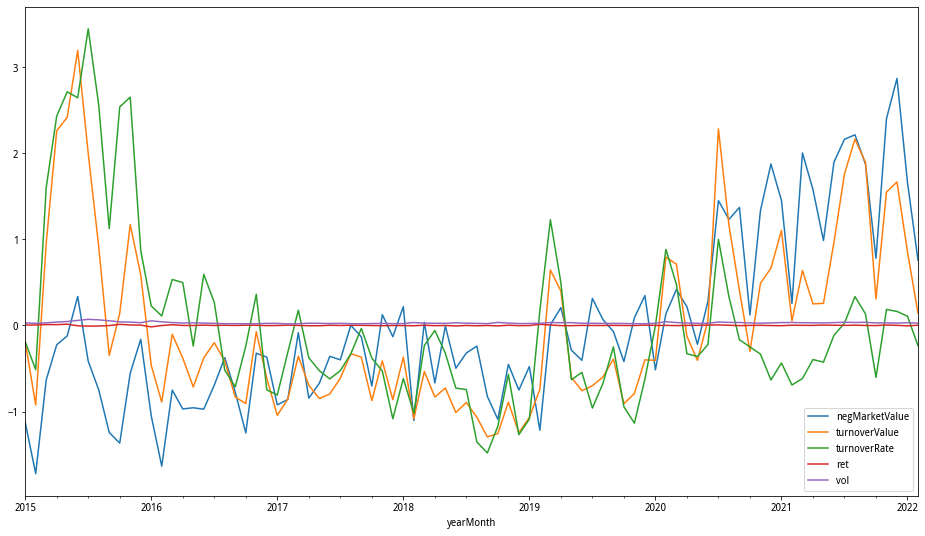

In [276]:
group.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d898842d0>,
      dtype=object)

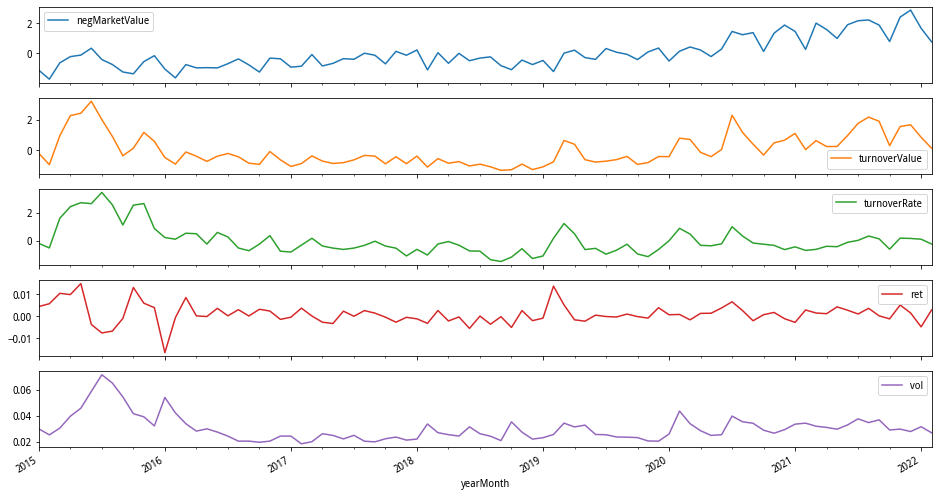

In [277]:
group.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0da13ba810>,
      dtype=object)

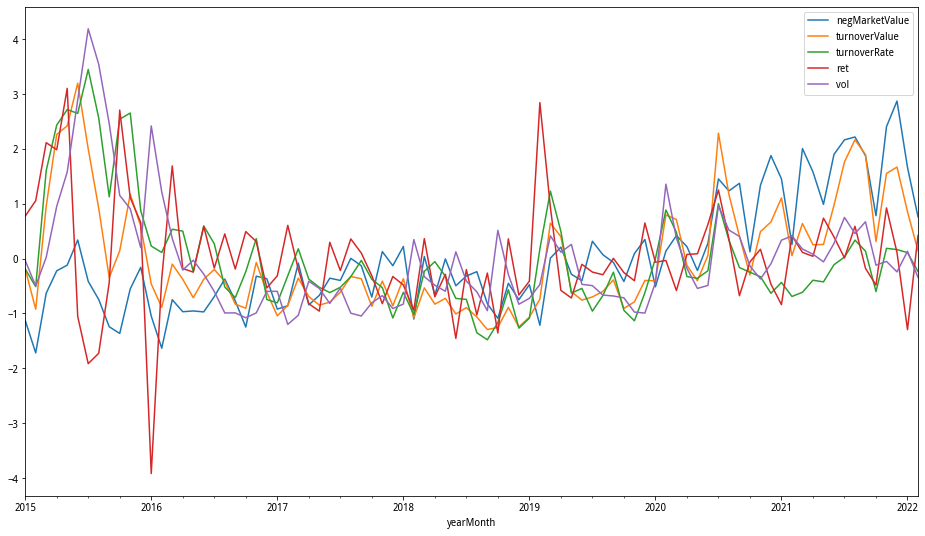

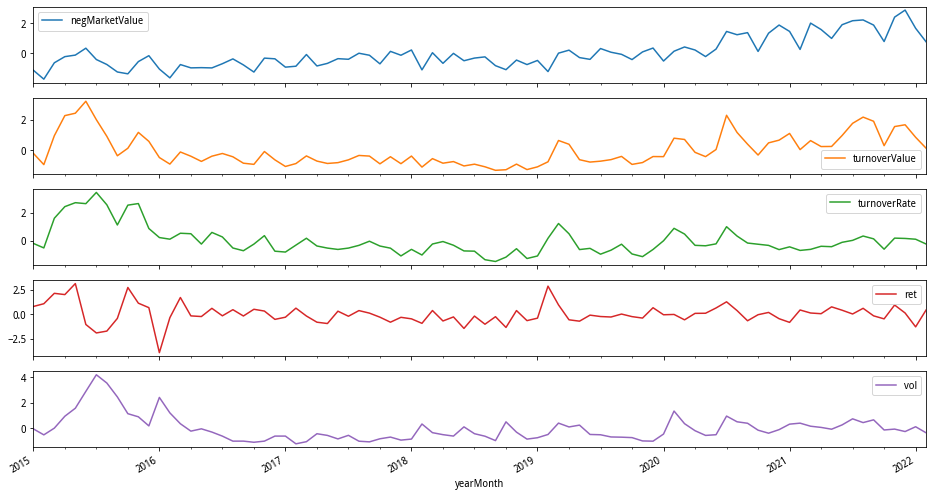

In [278]:
group[group.columns] = StandardScaler().fit(group).transform(group)

group.plot()

group.plot(subplots=True)

In [279]:
group[['turnoverRate','ret']].corr()

turnoverRate       ret
turnoverRate      1.000000  0.290357
ret               0.290357  1.000000

In [280]:
group[['turnoverValue','ret']].corr()

turnoverValue       ret
turnoverValue       1.000000  0.238763
ret                 0.238763  1.000000

In [281]:
group.corr()

negMarketValue  turnoverValue  turnoverRate       ret  \
negMarketValue        1.000000       0.621448     -0.037925  0.014866   
turnoverValue         0.621448       1.000000      0.698616  0.238763   
turnoverRate         -0.037925       0.698616      1.000000  0.290357   
ret                   0.014866       0.238763      0.290357  1.000000   
vol                   0.038187       0.597176      0.738419 -0.187219   

                     vol  
negMarketValue  0.038187  
turnoverValue   0.597176  
turnoverRate    0.738419  
ret            -0.187219  
vol             1.000000